# EL CASO: Mercado Inmobiliario de Melbourne (2016-2017)

## ABSTRACT


En este trabajo voy a analizar el comportamiento de la oferta inmobiliaria en la Ciudad de Melbourne, Australia. Buscaré describir las características de la oferta, identificar las principales variables que influyen en el precio, y  generar un modelo predictivo que permita predecir el precio de publicación de la oferta inmobiliaria de un área urbana determinada.

Para ello, trabajaré sobre un dataset de   [Melbourne, Australia](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot), relevado por Tony Pino, para el periodo **2016-2017** y publicado en Kaggle.

El motivo de la elección de este dataset es doble:
En primer lugar, porque era uno de los mejor valorados en el sitio para estas temáticas.

En segundo lugar, porque incluye una variable de **distancia al centro urbano**, que de acuerdo a la bibliografía existente **es una de las variables que determina en mayor medida el valor del suelo urbano** (Topalov, Ch., (1987), “*De la propi’et’epartag’ee marchande a lapropiete priv’ecapitalista. La transformation du logement en capital”, en Le logement en France. Histoire de une marchandise imposible , Presses de la Fondation
Nationale des Sciences Politiques, Paris.*).


**Este ejercicio busca poner a prueba esta teoría, para evaluar si lo observado en Europa a fines de los años 80's es válido para otro contexto urbano e histórico.**


## Objetivo
El objetivo principal de este trabajo es identificar y analizar las variables o características que tienen mayor influencia en el precio de  las propiedades en la ciudad de Melbourne, y generar un modelo predictivo para el costo de las mismas, utilizando modelos de regresión.

## Hipótesis

La hipotesis central es que el precio de la propiedad esta determinado principalmente por una interacción entre el tamaño de las propiedades (Cantidad de metros cuadrados construidos y/o totales del lote) y la distancia promedio del centro de la ciudad.


## Hipótesis secundarias

A modo de hipótesis secundarias, me interesa indagar el efecto que tienen sobre el precio:
*   La cantidad y tipo de ambientes en una vivienda (Cuartos, baños y cocheras).
*   La antiguedad de la vivienda.
*   Evaluar si el tipo de propiedad tiene algún efecto significativo.
*   Y tratar de determinar si hay otras variables o interacciones entre variables que tienen algún tipo de efecto sobre el precio.

##	Problema Comercial
Estudiar el precio de la oferta inmobiliaria y conocer que variables son las que tienen mayor influencia en los precios permite tener mayores herramientas para analizar un mercado complejo como es el inmobiliario. El generar un modelo que permita predecir el precio de una vivienda puede ser un instrumento útil no solo para quienes ofertan, sino también para identificar “oportunidades” por parte de la demanda.

## Contexto analítico

Este trabajo busca contribuir al conocimiento de las dinámicas de los mercados inmobiliarios a partir de un análisis de caso. Espera poder ser de utilidad para  especialistas en urbanismo, responsables de políticas habitacionales/inmobiliarias y tomadores de decisiones en procesos de desarrollo inmobiliario y/o grandes actores en el mercado inmobiliario. No obstante lo cual, puede eventualmente servir de forma marginal para usuarios finales (vendedores y compradores) en sus procesos de toma de decisiones al momento de participar de dichos mercados, tanto desde el punto de vista de la oferta (para conocer los precios de mercado adecuado al momento de ofertar), como por parte de la demanda (para identificar "oportunidades" de mercado).

# Preparación de los datos

Librerias utilizadas

In [ ]:
#Importo librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd

import statsmodels.formula.api as sm
from  scipy import stats
from scipy.stats import pearsonr

# import requests
# import json

import warnings
warnings.filterwarnings('ignore')

Importo base de datos y la exploro

In [ ]:
#Cargo la base de casasde Melbourne
mb = pd.read_csv('Melbourne housing prices - Buffers airbnb.csv')
mb = mb.drop(columns=['Unnamed: 0'])
mb.shape

(13580, 27)

In [ ]:
mb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Latitude,Longitude,Regionname,Propertycount,geometry,index_right,neighbourhood,Barrio,buffers,abnb_5
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,-37.7996,144.9984,Northern Metropolitan,4019.0,POINT (144.9984 -37.7996),9.0,Yarra,Yarra,"POLYGON ((145.00289155587495 -37.7996, 145.002...",53
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,-37.8079,144.9934,Northern Metropolitan,4019.0,POINT (144.9934 -37.8079),9.0,Yarra,Yarra,"POLYGON ((144.99789155587496 -37.8079, 144.997...",55
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,-37.8093,144.9944,Northern Metropolitan,4019.0,POINT (144.9944 -37.8093),9.0,Yarra,Yarra,"POLYGON ((144.99889155587496 -37.8093, 144.998...",62
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,-37.7969,144.9969,Northern Metropolitan,4019.0,POINT (144.9969 -37.7969),9.0,Yarra,Yarra,"POLYGON ((145.00139155587496 -37.7969, 145.001...",46
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,-37.8072,144.9941,Northern Metropolitan,4019.0,POINT (144.9941 -37.8072),9.0,Yarra,Yarra,"POLYGON ((144.99859155587495 -37.8072, 144.998...",47


In [ ]:
#Describo variables numéricas
mb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,index_right,abnb_5
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000,13563.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378,15.822163,27.704713
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772,7.865862,79.587482
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,0.000000,0.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000,10.000000,3.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000,15.000000,7.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000,22.000000,19.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,29.000000,1452.000000


In [ ]:
#Lista de variables
mb.columns.values

array(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude',
       'Longitude', 'Regionname', 'Propertycount', 'geometry',
       'index_right', 'neighbourhood', 'Barrio', 'buffers', 'abnb_5'],
      dtype=object)

In [ ]:
#Reviso casos perdidos
mb.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Latitude            0
Longitude           0
Regionname          0
Propertycount       0
geometry            0
index_right        17
neighbourhood      17
Barrio              5
buffers             0
abnb_5              0
dtype: int64

In [ ]:
print(f"Casos con tamaño del lote == 0: {sum(mb.Landsize==0)}")

Casos con tamaño del lote == 0: 1939


In [ ]:
mb.Type.unique()

array(['h', 'u', 't'], dtype=object)

## Consistencia de datos

Limpiamos datos incosistentes, absurdos o que generan "ruido" en la base

In [ ]:
mb.dropna(subset='YearBuilt', axis=0, inplace=True)
#se eliminan todos aquellos años anteriores a la fundación de melbourne o posteriores al año de publicación del dataset (2018)
mb = mb[(mb['YearBuilt'] >= 1835) & (mb['YearBuilt'] <= 2018)]
mb.shape

(8203, 27)

In [ ]:
#Elimino casos cuyo tamaño del terreno es igual a 0
mb = mb.loc[(mb['Landsize'] >0) & (mb['BuildingArea']> 0)]
mb.shape

(5824, 27)

In [ ]:
### codifico variables

#Tipo de propiedad
mb.Type.replace({'h':'House', 'u':'Unit', 't':'Townhouse'}, inplace =True)

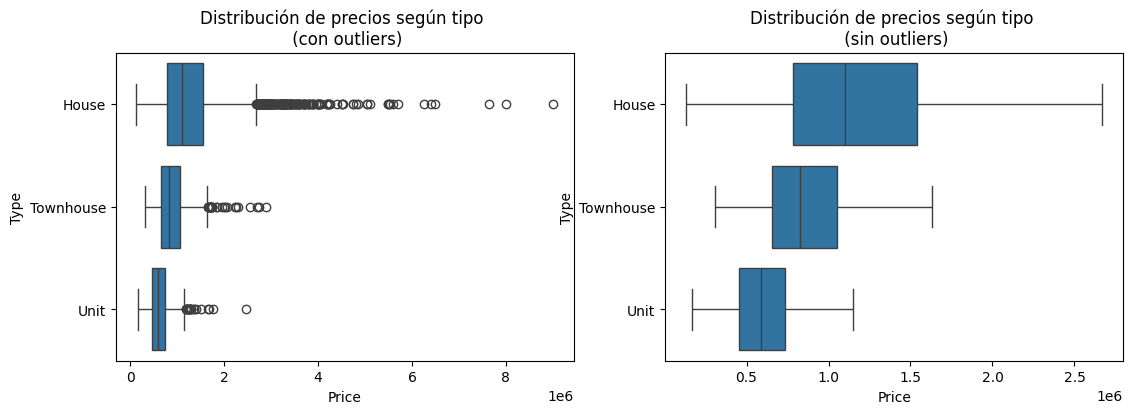

In [ ]:
#Reviso distribución de precio e identifico outliers para cada tipo de vivienda
fig, axs = plt.subplots(figsize= [13, 4],ncols=2)
ax1 = sns.boxplot(x=mb.Price, y= mb.Type, showfliers=True, ax=axs[0]).set(title='Distribución de precios según tipo \n (con outliers)')
ax2 = sns.boxplot(x=mb.Price, y= mb.Type, showfliers=False, ax=axs[1]).set(title='Distribución de precios según tipo \n (sin outliers)')

Aquí observamos la distribución de los precios de las propiedades según el tipo de unidad o propiedad. A la izquierda vemos la distribución considerando los outliers o valores extremos, y a la derecha son excluidos del análisis.

Este tipo de gráfico nos permite ver rápida y resumidamente la distribución, ya que vemos la mediana, y los cuartiles que se encuentran a su derecha e izquierda.

A primera vista, vemos que las Casas (Houses), si bien tienden a tener valores mas elevados, tienen una mucho mayor dispersión en los precios que sus contrapartes. Luego son seguidas por los departamentos ("Townhouse" son llamados en Nueva Zelanda), con menores precios que las casas y menor dispersión de los mismos. Por último se encuentran las Unidades (Units) o PHs.



**INSIGHT:** El tipo de propiedad pareciera tener algún tipo de incidencia en el los precios.

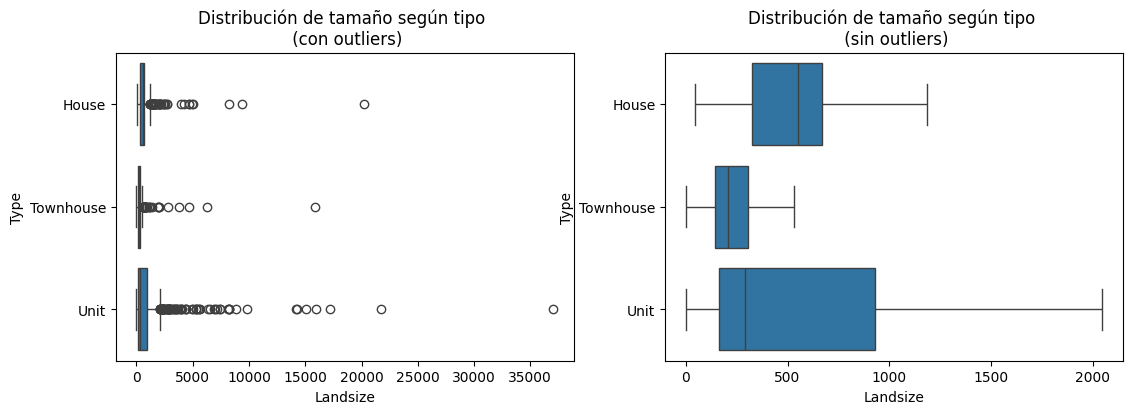

In [ ]:
#Reviso distribución de tamaño e identifico outliers para cada tipo de vivienda
fig, axs = plt.subplots(figsize= [13, 4],ncols=2)
ax1 = sns.boxplot(x=mb.Landsize, y= mb.Type, showfliers=True, ax=axs[0]).set(title='Distribución de tamaño según tipo \n (con outliers)')
ax2 = sns.boxplot(x=mb.Landsize, y= mb.Type, showfliers=False, ax=axs[1]).set(title='Distribución de tamaño según tipo \n (sin outliers)')

**INSIGHT:** De forma similar, el tipo de propiedad parece tener algún grado de relación con el tamaño de la misma.

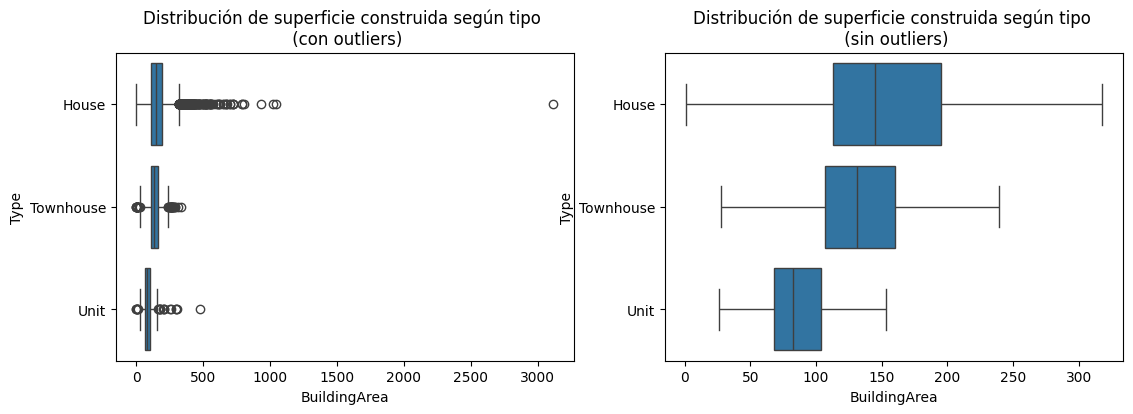

In [ ]:
#Reviso distribución de tamaño e identifico outliers para cada tipo de vivienda
fig, axs = plt.subplots(figsize= [13, 4],ncols=2)
ax1 = sns.boxplot(x=mb.BuildingArea, y= mb.Type, showfliers=True, ax=axs[0]).set(title='Distribución de superficie construida según tipo \n (con outliers)')
ax2 = sns.boxplot(x=mb.BuildingArea, y= mb.Type, showfliers=False, ax=axs[1]).set(title='Distribución de superficie construida según tipo \n (sin outliers)')

In [ ]:
#Genero un nuevo df eliminando los outliers de precios ni tamaño del lote y propiedad
mb2 = pd.DataFrame(mb.loc[(mb['Price']<= 2500000) & (mb['Landsize']<= 2500) & (mb['BuildingArea'] <=350)])
mb2.shape

(5393, 27)

## Generación de nuevas variables

In [ ]:
#Calculamos precio por metro cuadrado
mb2['precio_m2_L'] = mb2.Price/mb2.Landsize
mb2['precio_m2_L'].describe()

count      5393.000000
mean       3381.806089
std        8412.777168
min          78.824031
25%        1410.256410
50%        2423.192771
75%        4000.000000
max      440000.000000
Name: precio_m2_L, dtype: float64

In [ ]:
mb2['precio_m2_B'] = mb2.Price/mb2.BuildingArea
mb2['precio_m2_B'].describe()

count    5.393000e+03
mean     9.811902e+03
std      3.241363e+04
min      8.451613e+02
25%      5.513699e+03
50%      7.281553e+03
75%      9.451064e+03
max      1.060000e+06
Name: precio_m2_B, dtype: float64

El precio normalizado, es decir, el precio por metro cuadrado (tanto para lote como para superficie cubierta), es una variables central para el análisis exploratorio, ya que nos permite a simple vista comparar y observar el comportamiento de otras variables, ignorando el efecto del tamaño de la propiedad en el precio.

In [ ]:
#genero una variable "total" con valor uno, para luego poder sumar al agrupar.
mb2['total'] = 1

# Primeros resultados: Análisis Exploratorio de Datos (EDA)

In [ ]:
#PREcio promedio
print(f"Precio promedio: {round(mb2.Price.mean(),0)}")

Precio promedio: 1053458.0


### **¿Cómo se distribuye la oferta?**

In [ ]:
# Aprovechamos que contamos ocn las coordinadas de las viviendas y mepeamos la distribución y
# concentración espacial de las viviendas ofertadas

mh = folium.Map(location=[-37.80802, 144.96168], zoom_start=10)
HeatMap(data=mb2[['Latitude', 'Longitude']], radius=15).add_to(mh)

mh.save('mapa_calor.html')

mh

 De manera esperable, se observa la mayor concentración de la oferta en la zona céntrica de Melbourne, y extendiéndose hacia las perisferias.

 **INSIGHT:** La alta concentración de oferta en la zona centro da cuenta de que es dicha zona debe ser la mas densamente poblada, la de mayor concentración de infraestructura pública, y -por lo tanto- la mas buscada o deseada por la demanda habitacional.

In [ ]:
import random
from folium.plugins import MarkerCluster

# Crear un dataframe de ejemplo

df = mb2

# Obtener los nombres únicos de los barrios
barrios_unicos = df['Suburb'].unique()

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Generar colores aleatorios para los barrios
colores_barrios = {barrio: '#{:06x}'.format(random.randint(0, 0xFFFFFF)) for barrio in barrios_unicos}

# Crear un cluster de marcadores
cluster = MarkerCluster().add_to(mapa)

# Iterar sobre las filas del dataframe y agregar marcadores al mapa
for index, row in df.iterrows():
    popup_content = f"<b>Barrio:</b> {row['Suburb']}<br>" \
                    f"<b>Distancia al centro:</b> {row['Distance']}<br>" \
                    f"<b>Tipo de vivienda:</b> {row['Type']}<br>" \
                    f"<b>Área construida:</b> {row['BuildingArea']} m^2<br>" \
                    f"<b>Tamaño del lote:</b> {row['Landsize']} m^2<br>" \
                    f"<b>Cantidad de cuartos:</b> {row['Rooms']}<br>" \
                    f"<b>Año de construcción:</b> {row['YearBuilt']}<br>" \
                    f"<b>Precio:</b> ${row['Price']}"
    folium.Marker([row['Latitude'], row['Longitude']],
                  icon=None,
                  popup=popup_content,
                  clustered_marker=True,
                  cluster_id=row['Suburb'],
                  ).add_to(cluster)

mapa.save('mapa_nodos.html')

mapa

Output hidden; open in https://colab.research.google.com to view.

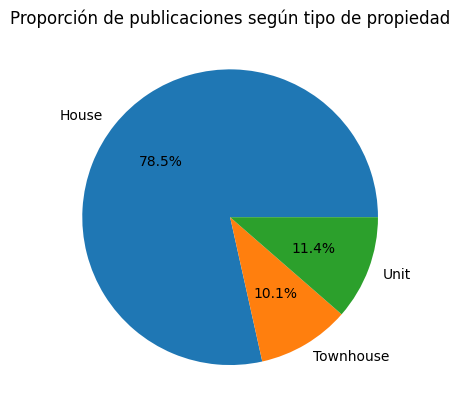

In [ ]:
#Distribución de las propiedades por tipo
labels = mb2.Type.unique()
casos = []
for tipo in labels:
  casos.append(sum(mb2.Type == tipo))

plt.title('Proporción de publicaciones según tipo de propiedad')
plt.pie(casos, labels=labels, autopct='%.1f%%')

plt.savefig('Figura 1.2: Publicaciones según tipo.png', dpi=fig.dpi)
plt.show()

**INSIGHT:** La mayoría absoluta de lo publicado refiere a **casas**, siendo casi **8 de cada 10**, mientras que 1 de cada 10 son PH ("unidades") y 1 de cada 10 son departamentos ("Townhouse").

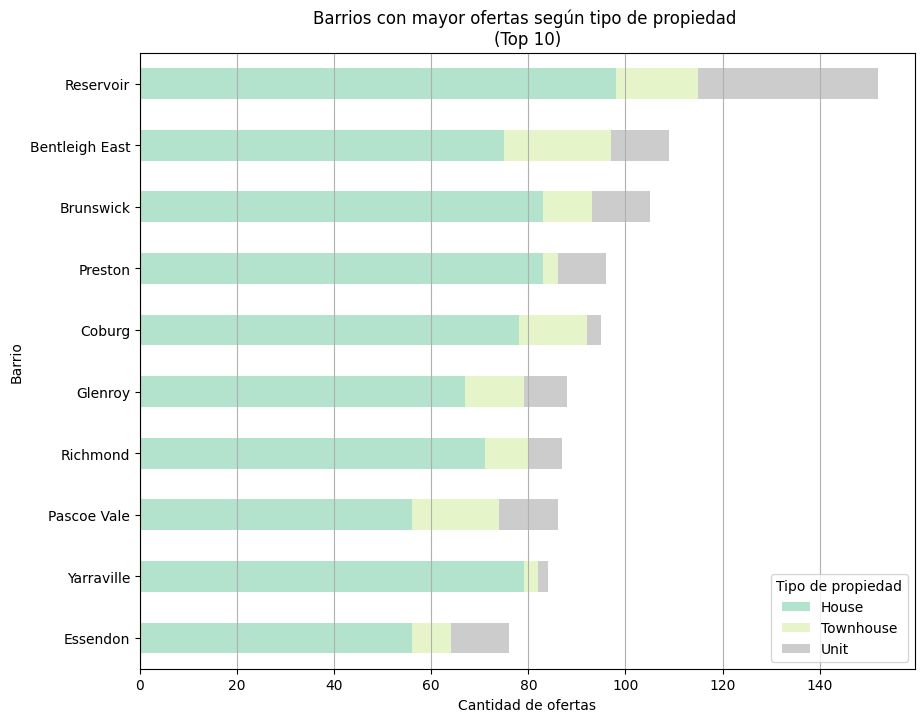

In [ ]:
# Crear el DataFrame
# Agrupar por barrio y tipo de propiedad, y contar el número de ofertas en cada grupo
ofertas_por_barrio_tipo = mb2.groupby(['Suburb', 'Type']).size().unstack(fill_value=0)
ofertas_por_barrio_tipo['total']=ofertas_por_barrio_tipo.sum(axis=1)
ofertas_por_barrio_tipo.sort_values(by='total', ascending=False,inplace=True)

N=10
df = ofertas_por_barrio_tipo[:N].sort_values(by='total', ascending=True)

# Graficar
df[['House', 'Townhouse', 'Unit']].plot(kind='barh', stacked=True, figsize=(10, 8),colormap='Pastel2')
plt.xlabel('Cantidad de ofertas')
plt.ylabel('Barrio')
plt.title('Barrios con mayor ofertas según tipo de propiedad \n(Top 10)')
plt.legend(title='Tipo de propiedad')
plt.grid(axis='x')

plt.savefig('Figura 1.2.2: Principales barrios.png', dpi=fig.dpi)

plt.show()


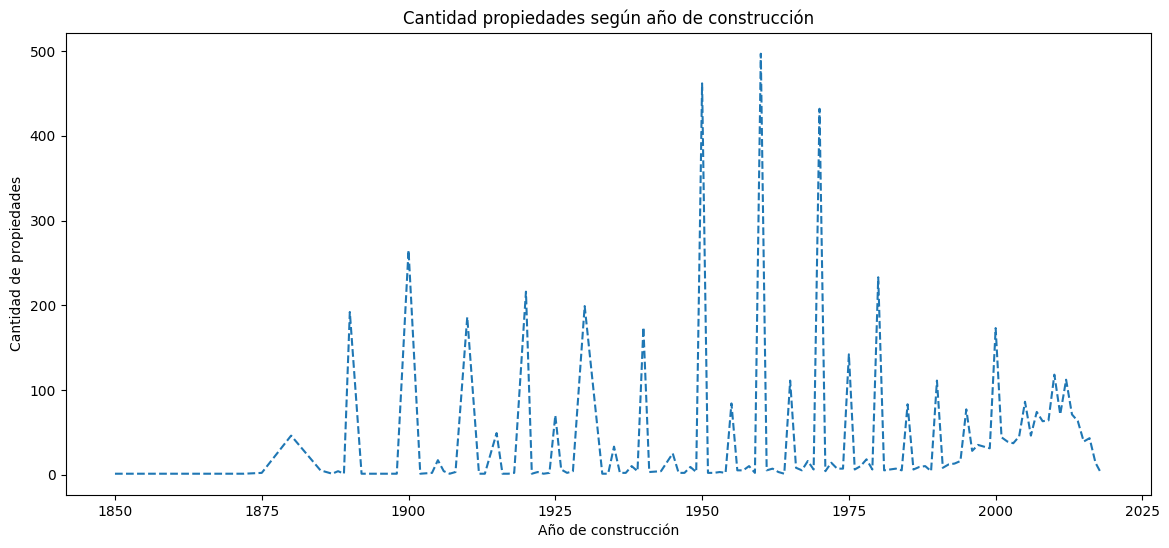

In [ ]:
# Años de construcción de la vivienda
N_año = mb2['YearBuilt'].value_counts().reset_index()
N_año.columns = ['YearBuilt', 'Count']

yearly_counts = N_año.sort_values(by='YearBuilt')

plt.figure(figsize=(14, 6))  # Tamaño del gráfico
sns.lineplot(data=yearly_counts, x='YearBuilt', y='Count',linestyle = "dashed") # Grafico de líneas
plt.title('Cantidad propiedades según año de construcción')
plt.xlabel('Año de construcción')
plt.ylabel('Cantidad de propiedades')

plt.savefig('Figura 1.3: Año de construcción.png', dpi=fig.dpi)

plt.show()

Se observan picos en las fechas de construcción de las viviendas, pareciera indicar que la calidad del dato relevado es baja, siendo que se declaran fechas redondeadas a 0 o 5. Es decir, pareciera ser que los usuarios que cargaron la información de antigüedad de forma aproximada, especialmente cuanto mas antigua sea la propiedad.


**INSIGHT:** Debido al caracter no discreto y poco preciso que presenta la antigüedad a pesar de ser una variable métrica, conviene explorar la posibilidad de trabajarla de forma agrupada en lustros (5 años) o décadas (10 años).

In [ ]:
pd.crosstab(mb2.Regionname,mb2.Type,margins=True)

Type,House,Townhouse,Unit,All
Regionname,,,,
Eastern Metropolitan,514,56,60,630
Eastern Victoria,24,0,1,25
Northern Metropolitan,1290,156,171,1617
Northern Victoria,25,0,0,25
South-Eastern Metropolitan,178,13,13,204
Southern Metropolitan,1080,184,267,1531
Western Metropolitan,1102,136,103,1341
Western Victoria,20,0,0,20
All,4233,545,615,5393


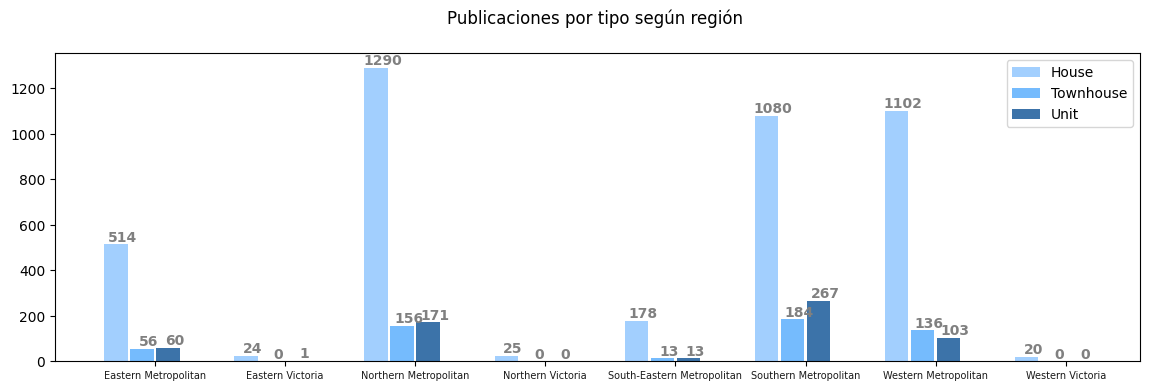

In [ ]:
#Grafico barras verticales: Cantidad de publicaciones por tipo según región

#defino df, varras y aperturas
df = mb2
barras = mb2.Type.unique()
aperturas =mb2.Regionname.sort_values().unique()

####Valores de las barras para cada apertura
#Barra 1
barra1 = []
for reg in aperturas:
  barra1.append(df.loc[(df['Regionname']==reg) & (df['Type']==barras[0])].shape[0])

#Barra 2
barra2 = []
for reg in aperturas:
  barra2.append(df.loc[(df['Regionname']==reg) & (df['Type']==barras[1])].shape[0])

#Barra 3
barra3 = []
for reg in aperturas:
  barra3.append(df.loc[(df['Regionname']==reg) & (df['Type']==barras[2])].shape[0])

#Formato
x = np.arange(len(aperturas))  # Ubicación dde las etiquetas
width = 0.18  # Ancho de las barras

fig, ax = plt.subplots(figsize= [14, 4])

rects1 = ax.bar(x-0.30, barra1, width, label=barras[0], color='#a2cffe')
rects2 = ax.bar(x-0.10, barra2, width, label=barras[1], color='#75bbfd')
rects3 = ax.bar(x+0.10, barra3, width, label=barras[2], color='#3c73a9')

# Acomodamos formato del gráfico

####Título del gráfico
ax.set_title('Publicaciones por tipo según región \n ')
ax.set_xticks(x)
ax.set_xticklabels(aperturas, alpha=0.9,fontsize=7)
ax.legend(loc='best')

#función para agregar etiquetas  (Tomada de stackoverflow)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 4, height),
                    xytext=(9, +0),
                    textcoords="offset points",
                    ha='center', va='bottom', color='gray',fontsize=10, weight='bold' )

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig('Figura 1.4: Publicaciones según tipo x region.png', dpi=fig.dpi)

plt.show()

**INSIGHT:** La oferta no solo varía por barrio o suburbio, si no que tambien su composición relativa según tipo de vivienda, si bien en todos los casos las "Casas" (Houses) son el tipo predominante.

## ¿Cómo interactuan las variables? ¿Cuales son las variables mas influyentes en el precio?

In [ ]:
#Elimino outliers de precio promedio
mb3 = mb2[(mb2['precio_m2_L']<15000) & (mb2['precio_m2_B']<15000)]
mb3.shape

(5164, 30)

In [ ]:
mb3.groupby('Type')['precio_m2_B'].mean()[0]/1000

7.599797357045511

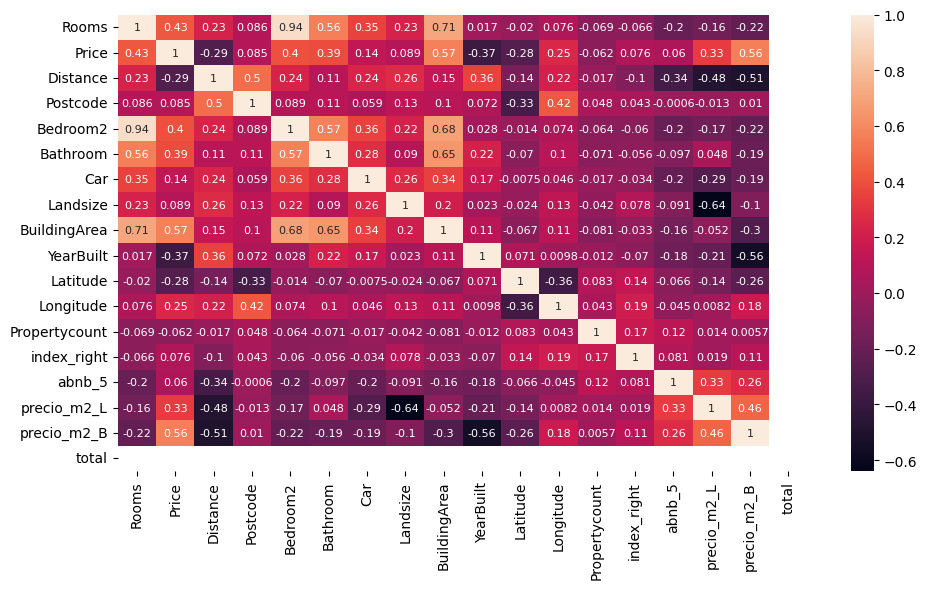

In [ ]:
#Genero una matriz decorrelaciones para analizar a simple vista las interacciones entre variables
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(mb3.corr(numeric_only= True),
            annot=True,annot_kws={'size': 8},
            ax=ax)

plt.savefig('Figura 0: Matriz de correlaciones.png', dpi=fig.dpi)

plt.tight_layout()

A simple vista, se observa que las variables Rooms y Bedroom2 -de forma esperable- tienen una muy alta correlación. Habría que seleccionar una sola para incluir en el modelo.

En segundo lugar, la variable objetivo "Price", muestra una baja correlación positiva con las variables Rooms y Bedroom2 (0.44 y 0.42, respectivamente) y  BuildingArea (0.48), situación que se reduce totalmente cuando se considera el tamaño del lote (Landsize = 0.1).

Por otro lado, se observa una baja correlación negativa entre el precio y el año de construcción (YearBuilt --> -0.36), y con respecto a la distancia del centro (Distance --> -0.29). Esto quiere decir que las casas mas antiguas tienden a ser mas caras, y que cuanto mas nos alejamos del centro, se reduce el precio de las viviendas.

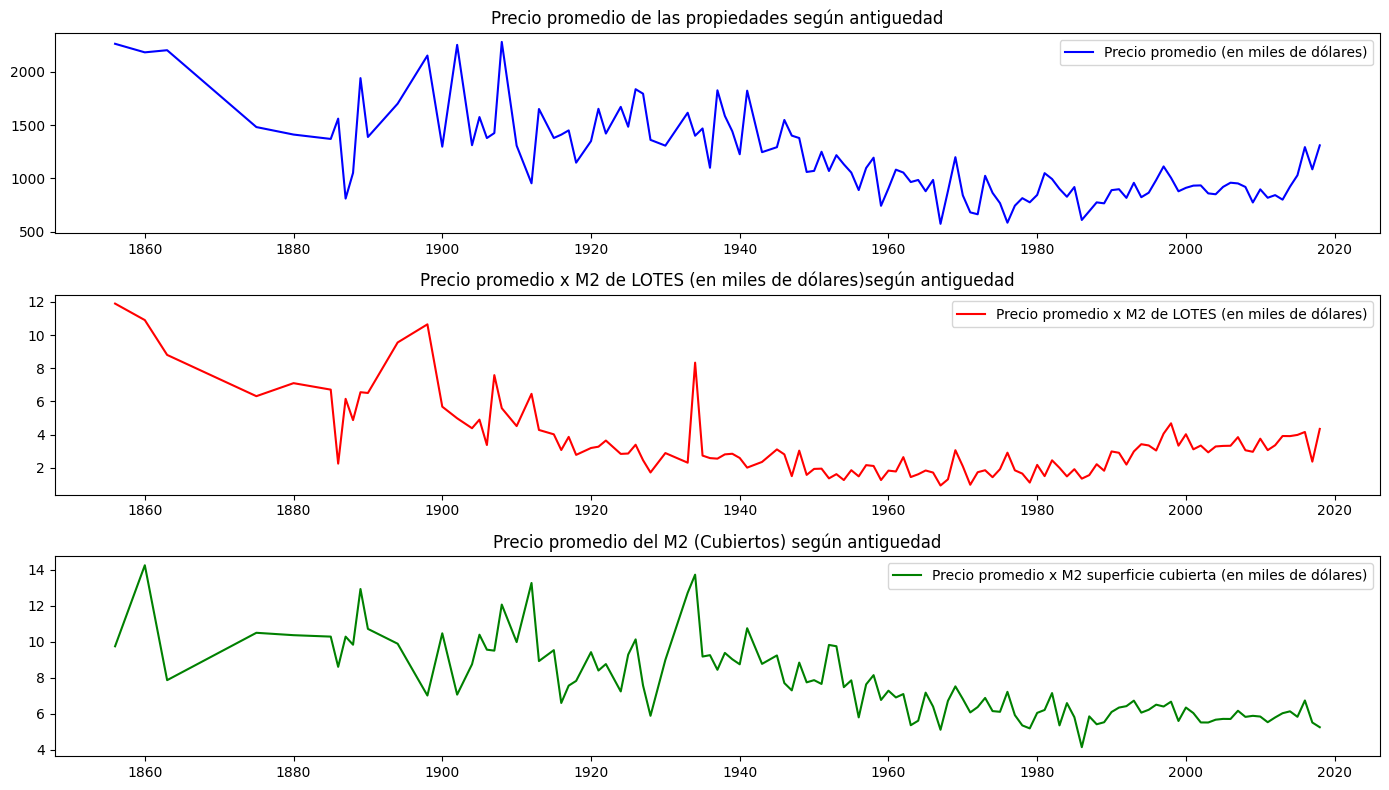

In [ ]:
#grafico precios según la antiguedad

y1 = mb3.groupby('YearBuilt')['Price'].mean()/1000
y2 = mb3.groupby('YearBuilt')['precio_m2_L'].mean()/1000
y3 = mb3.groupby('YearBuilt')['precio_m2_B'].mean()/1000
x = mb3.groupby('YearBuilt')['Price'].mean().index

# Configuración de los subplots
plt.figure(figsize=(14, 8))

# Primer gráfico
plt.subplot(3, 1, 1)
plt.plot(x, y1, label='Precio promedio (en miles de dólares)', color='b')
plt.title('Precio promedio de las propiedades según antiguedad')
plt.legend()

# Segundo gráfico
plt.subplot(3, 1, 2)
plt.plot(x, y2, label='Precio promedio x M2 de LOTES (en miles de dólares)', color='r')
plt.title('Precio promedio x M2 de LOTES (en miles de dólares)según antiguedad')
plt.legend()

# Tercer gráfico
plt.subplot(3, 1, 3)
plt.plot(x, y3, label='Precio promedio x M2 superficie cubierta (en miles de dólares)', color='g')
plt.title('Precio promedio del M2 (Cubiertos) según antiguedad')
plt.legend()

# Ajustar y mostrar los gráficos
plt.tight_layout()

plt.savefig('Figura 2.2: Precio promedio según antiguedad.png', dpi=fig.dpi)

plt.show()

**INSIGHT:** En términos generales, si bien hay muchos picos, se observa que **a medida que las propiedades son mas nuevas, el precio tiende a reducirse**.

NOTA: profundizar en esta tendencia. Puede ser producto de cambios en pautas habitacionales (por ejemplo, incremento en el peso de departamentos sobre casas), y/o por el efecto del crecimiento urbano, donde las casas mas nuevas pueden ser también las más alejadas del centro.

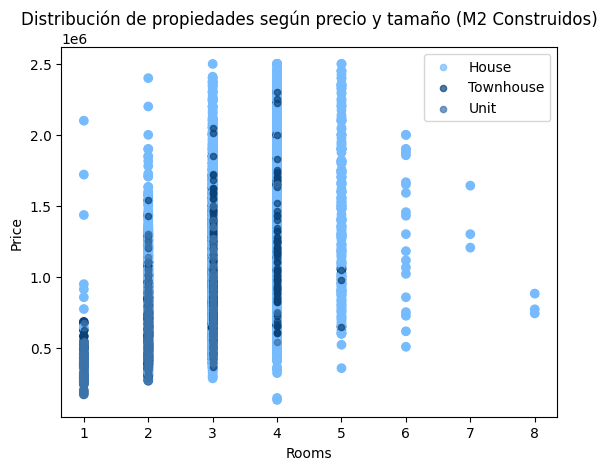

Correlación (Coeficiente pearson) entre tamaño del lote y cantidad de cuartos: 0.426, p = 0.0


In [ ]:
#Grafico de dispersión Tamaño-Precio
# Identifico variables
x = mb3.Rooms
y = mb3.Price
colors = {'House':'#75bbfd', 'Unit':'#3c73a9', 'Townhouse':'#0a437a'}

grouped = mb3.groupby('Type')

# Crear el gráfico de scatterplot
fig, ax = plt.subplots()
ax.scatter(x, y,c=mb3.Type.map(colors),label=colors)


# Añadir etiquetas y título al gráfico
ax.set_xlabel('Tamaño del lote')
ax.set_ylabel('Precio de las propiedades')
ax.set_title('Distribución de propiedades según precio y tamaño (M2 Construidos)')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Rooms', y='Price', label=key, color=colors[key], alpha = 0.7)


plt.savefig('Figura 3.0: Distribución de propiedades según precio y habitaciones.png', dpi=fig.dpi)

plt.show()
print(f"Correlación (Coeficiente pearson) entre tamaño del lote y cantidad de cuartos: {round(pearsonr(x,y)[0],3)}, p = {round(pearsonr(x,y)[1],4)}")

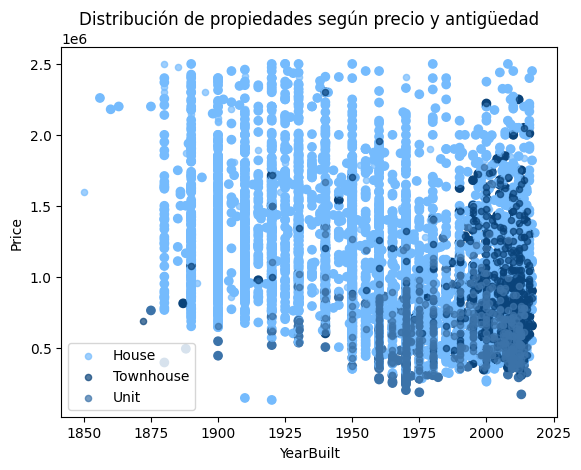

Correlación (Coeficiente pearson) entre antigüedad y precio: -0.374, p = 0.0


In [ ]:
#Grafico de dispersión Tamaño-Precio
# Identifico variables
x = mb3.YearBuilt
y = mb3.Price
colors = {'House':'#75bbfd', 'Unit':'#3c73a9', 'Townhouse':'#0a437a'}

grouped = mb2.groupby('Type')

# Crear el gráfico de scatterplot
fig, ax = plt.subplots()
ax.scatter(x, y,c=mb3.Type.map(colors),label=colors)


# Añadir etiquetas y título al gráfico
ax.set_xlabel('Antigüedad de la vivienda')
ax.set_ylabel('Precio de las propiedades')
ax.set_title('Distribución de propiedades según precio y antigüedad')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='YearBuilt', y='Price', label=key, color=colors[key], alpha = 0.7)

plt.savefig('Figura 3.1: Distribución de propiedades según precio y antigüedad.png', dpi=fig.dpi)

plt.show()
print(f"Correlación (Coeficiente pearson) entre antigüedad y precio: {round(pearsonr(x,y)[0],3)}, p = {round(pearsonr(x,y)[1],4)}")

**INSIGHT:** No se observa una relación importante entre la antigüedad y los precios de la viviendas, aunque se insinua una tendencia hacia la caida de los precios. De forma esperable, queda en evidencia que los tipos de vivienda distintos a "casa" ("House"), como ser "Townhouse" y "Unit", son mas nuevos.

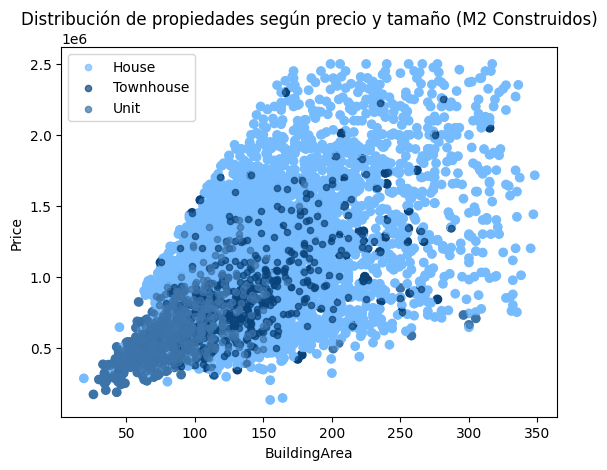

Correlación (Coeficiente pearson) entre tamaño del lote y precio: 0.568, p = 0.0


In [ ]:
#Grafico de dispersión Tamaño-Precio
# Identifico variables
x = mb3.BuildingArea
y = mb3.Price
colors = {'House':'#75bbfd', 'Unit':'#3c73a9', 'Townhouse':'#0a437a'}

grouped = mb3.groupby('Type')

# Crear el gráfico de scatterplot
fig, ax = plt.subplots()
ax.scatter(x, y,c=mb3.Type.map(colors),label=colors)


# Añadir etiquetas y título al gráfico
ax.set_xlabel('Tamaño del lote')
ax.set_ylabel('Precio de las propiedades')
ax.set_title('Distribución de propiedades según precio y tamaño (M2 Construidos)')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='BuildingArea', y='Price', label=key, color=colors[key], alpha = 0.7)


plt.savefig('Figura 3.2: Distribución de propiedades según precio y tamaño (M2 Construidos).png', dpi=fig.dpi)

plt.show()
print(f"Correlación (Coeficiente pearson) entre tamaño del lote y precio: {round(pearsonr(x,y)[0],3)}, p = {round(pearsonr(x,y)[1],4)}")

Si bien el gráfico se encuentra muy saturado, podemos observar cierto grado de correlación positiva entre el tamaño de la propiedad y los precios (0.484 de coeficiente de pearson, con p valor para la hipótesis núla cercano a 0), como ya observamos en la matriz de correlaciones.

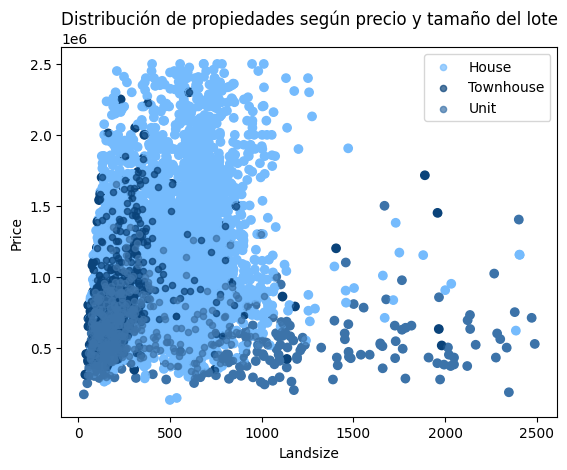

Correlación (Coeficiente pearson) entre tamaño del lote y precio: 0.089, p = 0.0


In [ ]:
#Grafico de dispersión Tamaño-Precio
# Identifico variables
x = mb3.Landsize
y = mb3.Price
colors = {'House':'#75bbfd', 'Unit':'#3c73a9', 'Townhouse':'#0a437a'}

grouped = mb3.groupby('Type')

# Crear el gráfico de scatterplot
fig, ax = plt.subplots()
ax.scatter(x, y,c=mb3.Type.map(colors),label=colors)


# Añadir etiquetas y título al gráfico
ax.set_xlabel('Tamaño del lote')
ax.set_ylabel('Precio de las propiedades')
ax.set_title('Distribución de propiedades según precio y tamaño del lote')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Landsize', y='Price', label=key, color=colors[key], alpha = 0.7)

plt.savefig('Figura 3.3: Distribución de propiedades según precio y tamaño del lote.png', dpi=fig.dpi)

plt.show()
print(f"Correlación (Coeficiente pearson) entre tamaño del lote y precio: {round(pearsonr(x,y)[0],3)}, p = {round(pearsonr(x,y)[1],4)}")

**INSIGHT:** Al considerar la relación existente entre el tamaño de los lotes y el precio, la correlación prácticamente desaparece (0.1).
Debe estar inlfuyendo otra(s) variable(s)

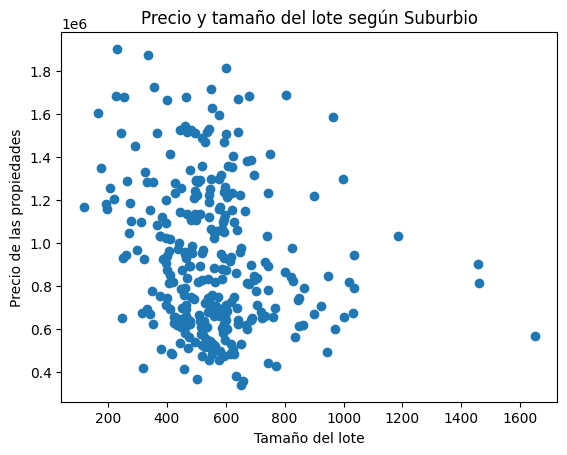

Correlación (Coeficiente pearson) entre tamaño del lote y precio: -0.203, p = 0.0


In [ ]:
#Grafico de dispersión Tamaño-Precio X BARRIO

# Identifico variables
x = mb3.groupby('Suburb')['Landsize'].mean()
y = mb3.groupby('Suburb')['Price'].mean()
# colors = {'House':'#75bbfd', 'Unit':'#3c73a9', 'Townhouse':'#0a437a'}

# grouped = mb2.groupby('Type')

# Crear el gráfico de scatterplot
fig, ax = plt.subplots()
ax.scatter(x, y)


# Añadir etiquetas y título al gráfico
ax.set_xlabel('Tamaño del lote')
ax.set_ylabel('Precio de las propiedades')
ax.set_title('Precio y tamaño del lote según Suburbio')

# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='Landsize', y='Price', label=key, color=colors[key], alpha = 0.7)

plt.savefig('Figura 4.1: Precio y tamaño del lote según Suburbio.png', dpi=fig.dpi)

plt.show()
print(f"Correlación (Coeficiente pearson) entre tamaño del lote y precio: {round(pearsonr(x,y)[0],3)}, p = {round(pearsonr(x,y)[1],3)}")

Si replicamos el mismo análisis pero a nivel de los suburbios y sus valores promedio, si bien es baja la correlación, encontramos que el sentido de la relación se invierte. La correlación entre tamaño de la propiedad y precio se vuelve negativa. Si bien a primera vista esto parece contraintuitivo, tiene cierta lógica considerando el comportamiento de los mercados inmboliarios y la bibliografía urbanística: El incremento de los lotes refleja una mayor distancia de los centros urbanos, dimensión muy asociada a la caida de los precios.

**INSIGHT:** Si consideramos solamente el área del edificio, se observa una baja correlación entre el precio y la superficie.

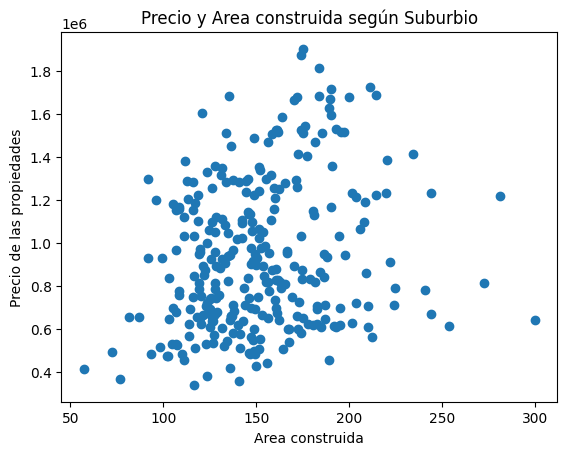

Correlación (Coeficiente pearson) entre Area construida y precio: 0.234, p = 0.0


In [ ]:
#Grafico de dispersión Tamaño-Precio X BARRIO

# Identifico variables
x = mb3.groupby('Suburb')['BuildingArea'].mean()
y = mb3.groupby('Suburb')['Price'].mean()
# colors = {'House':'#75bbfd', 'Unit':'#3c73a9', 'Townhouse':'#0a437a'}

# grouped = mb2.groupby('Type')

# Crear el gráfico de scatterplot
fig, ax = plt.subplots()
ax.scatter(x, y)

# Añadir etiquetas y título al gráfico
ax.set_xlabel('Area construida')
ax.set_ylabel('Precio de las propiedades')
ax.set_title('Precio y Area construida según Suburbio')

# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='Landsize', y='Price', label=key, color=colors[key], alpha = 0.7)

plt.savefig('Figura 4.2: Precio y Area construida según Suburbio.png', dpi=fig.dpi)

plt.show()
print(f"Correlación (Coeficiente pearson) entre Area construida y precio: {round(pearsonr(x,y)[0],3)}, p = {round(pearsonr(x,y)[1],3)}")

### ¿Cuanto importa el barrio?

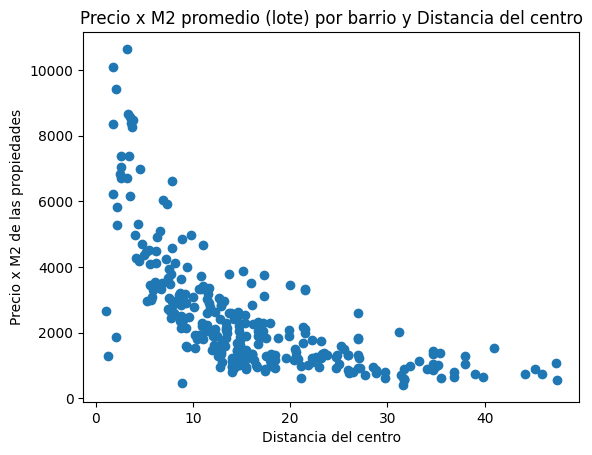

Correlación (Coeficiente pearson) entre Distancia al centro  (CBD) y precio x M2: -0.646, p = 0.0


In [ ]:
#Grafico de dispersión Discancia al centro-Precio X BARRIO

# Identifico variables
x = mb3.groupby('Suburb')['Distance'].mean()
y = mb3.groupby('Suburb')['precio_m2_L'].mean()
# colors = {'House':'#75bbfd', 'Unit':'#3c73a9', 'Townhouse':'#0a437a'}

# grouped = mb2.groupby('Type')

# Crear el gráfico de scatterplot
fig, ax = plt.subplots()
ax.scatter(x, y)


# Añadir etiquetas y título al gráfico
ax.set_xlabel('Distancia del centro')
ax.set_ylabel('Precio x M2 de las propiedades')
ax.set_title('Precio x M2 promedio (lote) por barrio y Distancia del centro')

# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='Landsize', y='Price', label=key, color=colors[key], alpha = 0.7)

plt.savefig('Figura 4.3: Precio x M2 promedio (lote) por barrio y Distancia del centro.png', dpi=fig.dpi)

plt.show()
print(f"Correlación (Coeficiente pearson) entre Distancia al centro  (CBD) y precio x M2: {round(pearsonr(x,y)[0],3)}, p = {round(pearsonr(x,y)[1],3)}")

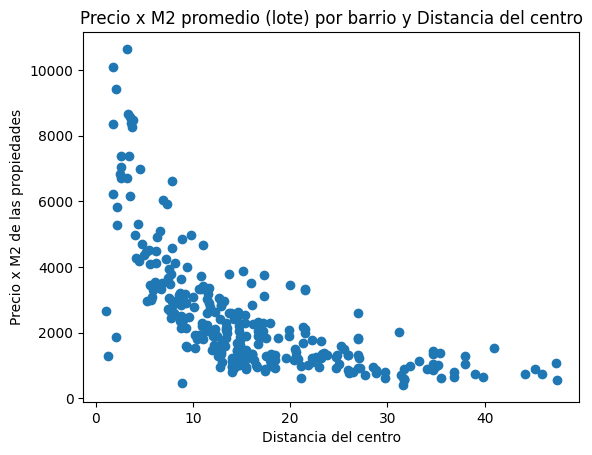

Correlación (Coeficiente pearson) entre Distancia al centro  (CBD) y precio x M2: -0.646, p = 0.0


In [ ]:
#Grafico de dispersión Discancia al centro-Precio X BARRIO

# Identifico variables
x = mb3.groupby('Suburb')['Distance'].mean()
y = mb3.groupby('Suburb')['precio_m2_L'].mean()
# colors = {'House':'#75bbfd', 'Unit':'#3c73a9', 'Townhouse':'#0a437a'}

# grouped = mb2.groupby('Type')

# Crear el gráfico de scatterplot
fig, ax = plt.subplots()
ax.scatter(x, y)


# Añadir etiquetas y título al gráfico
ax.set_xlabel('Distancia del centro')
ax.set_ylabel('Precio x M2 de las propiedades')
ax.set_title('Precio x M2 promedio (lote) por barrio y Distancia del centro')

# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='Landsize', y='Price', label=key, color=colors[key], alpha = 0.7)

plt.savefig('Figura 4.3: Precio x M2 promedio (lote) por barrio y Distancia del centro.png', dpi=fig.dpi)

plt.show()
print(f"Correlación (Coeficiente pearson) entre Distancia al centro  (CBD) y precio x M2: {round(pearsonr(x,y)[0],3)}, p = {round(pearsonr(x,y)[1],3)}")

In [ ]:
model1 = 'Distance~precio_m2_L'
resultado = sm.ols(formula = model1, data=mb3).fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     1562.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.08e-298
Time:                        01:15:07   Log-Likelihood:                -16020.
No. Observations:                5164   AIC:                         3.204e+04
Df Residuals:                    5162   BIC:                         3.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.9908      0.123    121.693      

**INSIGHT:** Como se anticipaba en los análisis previos, l**a distancia al centro/ Distrito central y financiero (CBD) muestra una correlación negativa con el precio normalizadolos para cada barrio**. Es decir, **a mayor distancia del centro, menor es el precio (por metro cuadrado) de la propiedad.**
Se observa un caso con un valor muy elevado, probamos eliminando los outliers.

Esto parece apoyar la hipótesis de que la distancia del centro es un factor que determina el valor del suelo urbano,lo cual se traduce en un mayor valor dle M2 construido en promedio.

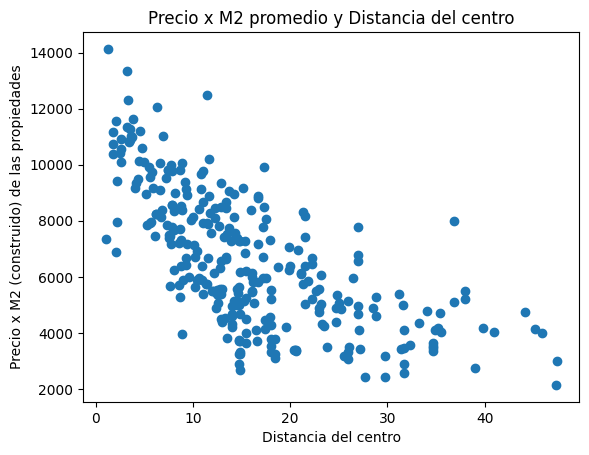

Correlación (Coeficiente pearson) entre Distancia al centro  (CBD) y precio x M2: -0.676, p = 0.0


In [ ]:
#Grafico de dispersión Discancia al centro-Precio X BARRIO

# Identifico variables
x = mb3.groupby('Suburb')['Distance'].mean()
y = mb3.groupby('Suburb')['precio_m2_B'].mean()
# colors = {'House':'#75bbfd', 'Unit':'#3c73a9', 'Townhouse':'#0a437a'}

# grouped = mb2.groupby('Type')

# Crear el gráfico de scatterplot
fig, ax = plt.subplots()
ax.scatter(x, y)


# Añadir etiquetas y título al gráfico
ax.set_xlabel('Distancia del centro')
ax.set_ylabel('Precio x M2 (construido) de las propiedades')
ax.set_title('Precio x M2 promedio y Distancia del centro')


plt.savefig('Figura 4.4: Precio x M2 promedio por barrio y Distancia del centro.png', dpi=fig.dpi)
plt.show()
print(f"Correlación (Coeficiente pearson) entre Distancia al centro  (CBD) y precio x M2: {round(pearsonr(x,y)[0],3)}, p = {round(pearsonr(x,y)[1],3)}")

**INSIGHT:** **Si consideramos el precio por M2 construido y no el total del lote, la correlación se incrementa, observandose que a mayor distancia del centro, es menor el precio por M2.**

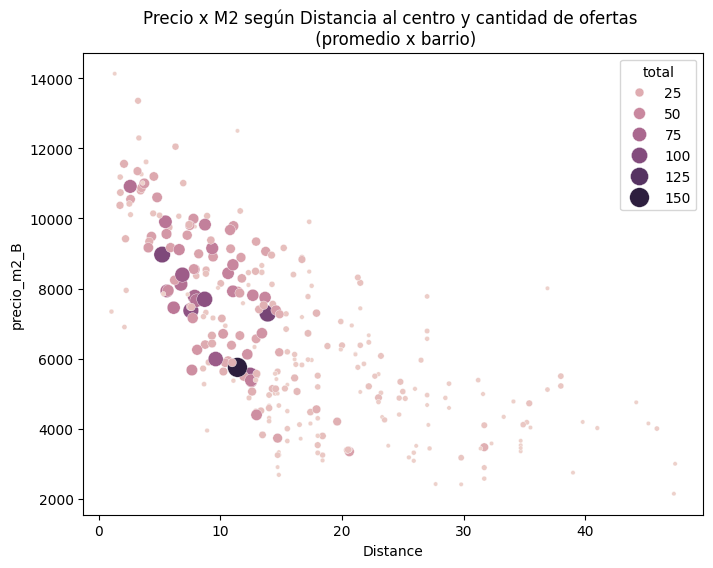

In [ ]:
#grafico Superficie construida vs Cantidad de habitaciones
fig, ax1 = plt.subplots(figsize= [8, 6], ncols=1)

# Identifico variables
x = 'Distance'
y = 'precio_m2_B'
z = 'total'

ax1 = sns.scatterplot(x=mb3.groupby('Suburb')[x].mean(), y= mb3.groupby('Suburb')[y].mean(),
                      hue = mb3.groupby('Suburb')[z].sum(), size=mb3.groupby('Suburb')[z].sum(), sizes=(10, 200),
                      ax=ax1).set(title='Precio x M2 según Distancia al centro y cantidad de ofertas \n (promedio x barrio)')

plt.savefig('Figura 5.1: Precio x M2 según Distancia al centro y cantidad de ofertas.png', dpi=fig.dpi)

**INSIGHT:** Al considerar el precio promedio por M^2 de las viviendas para cada barrio, según la distancia al centro comercial, no solo se observa que a medida que se aleja del centro cae el precio, si no que también cae la cantidad o concentración de ofertas.

### Precio vs Cantidad de cuartos, baños y garage

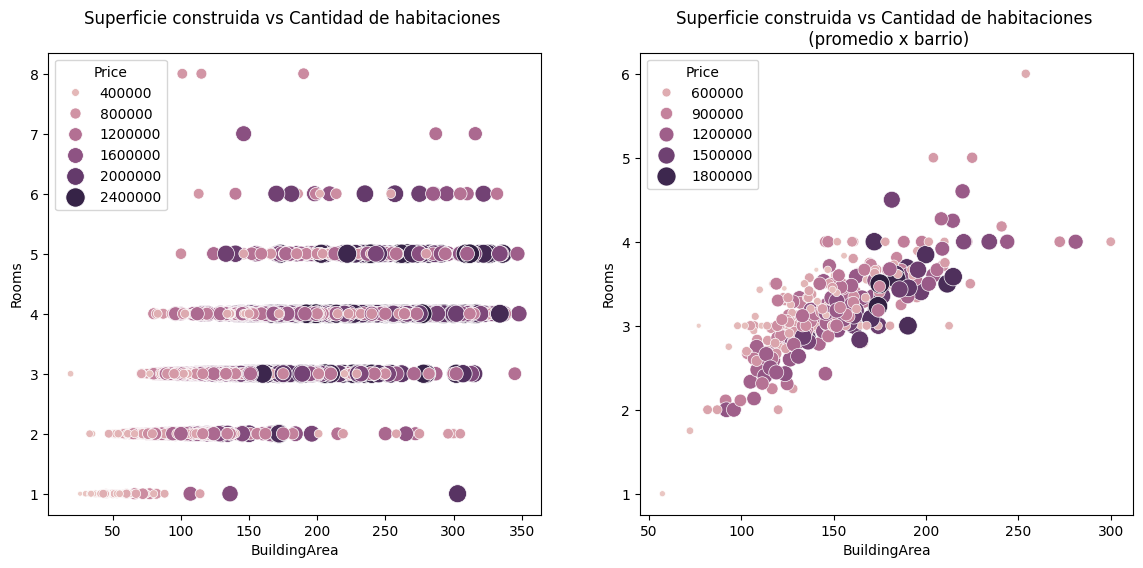

In [ ]:
#grafico Superficie construida vs Cantidad de habitaciones
fig, axs = plt.subplots(figsize= [14, 6], ncols=2)

# Identifico variables
x = 'BuildingArea'
y = 'Rooms'
z = 'Price'

ax1 = sns.scatterplot(x=mb3[x], y= mb3[y], hue = mb3[z] , size=mb3[z], sizes=(10, 200), ax=axs[0]).set(title='Superficie construida vs Cantidad de habitaciones \n')
ax2 = sns.scatterplot(x=mb3.groupby('Suburb')[x].mean(), y= mb3.groupby('Suburb')[y].mean(),hue = mb3.groupby('Suburb')[z].mean(),
                      size=mb3.groupby('Suburb')[z].mean(), sizes=(10, 200),  ax=axs[1]).set(title='Superficie construida vs Cantidad de habitaciones \n (promedio x barrio)')

plt.savefig('Figura 6.1: Superficie construida, cantidad de habitaciones y precio.png', dpi=fig.dpi)

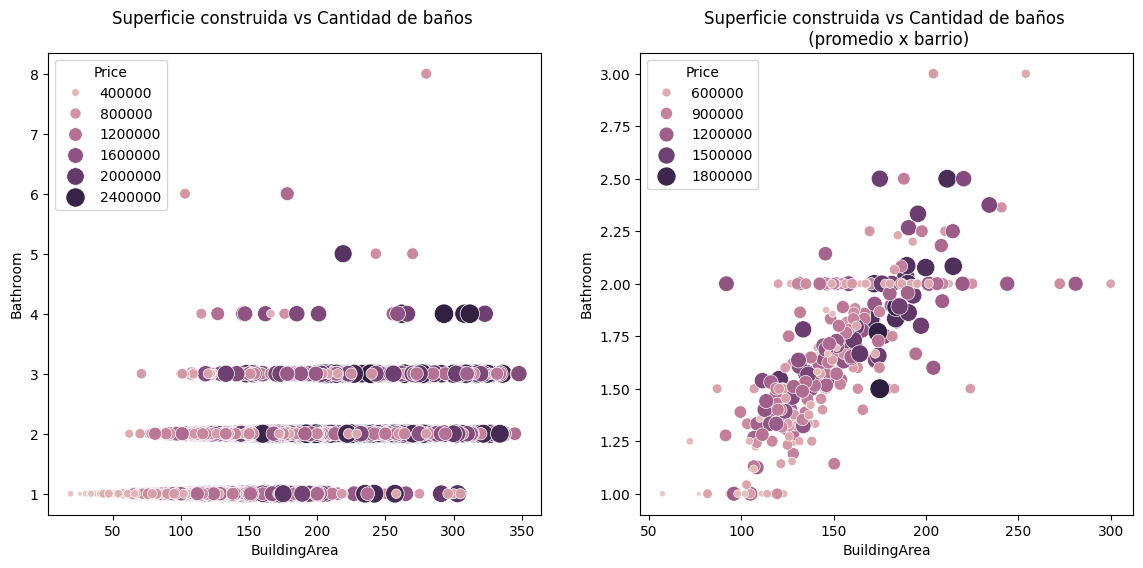

In [ ]:
#grafico Superficie construida vs Cantidad de habitaciones
fig, axs = plt.subplots(figsize= [14, 6], ncols=2)

# Identifico variables
x = 'BuildingArea'
y = 'Bathroom'
z = 'Price'

ax1 = sns.scatterplot(x=mb3[x], y= mb3[y], hue = mb3[z] , size=mb3[z], sizes=(10, 200), ax=axs[0]).set(title='Superficie construida vs Cantidad de baños \n')
ax2 = sns.scatterplot(x=mb3.groupby('Suburb')[x].mean(), y= mb3.groupby('Suburb')[y].mean(),hue = mb3.groupby('Suburb')[z].mean() , size=mb3.groupby('Suburb')[z].mean(), sizes=(10, 200), ax=axs[1]).set(title='Superficie construida vs Cantidad de baños \n (promedio x barrio)')

plt.savefig('Figura 6.2: Superficie construida, cantidad de baños y precio.png', dpi=fig.dpi)

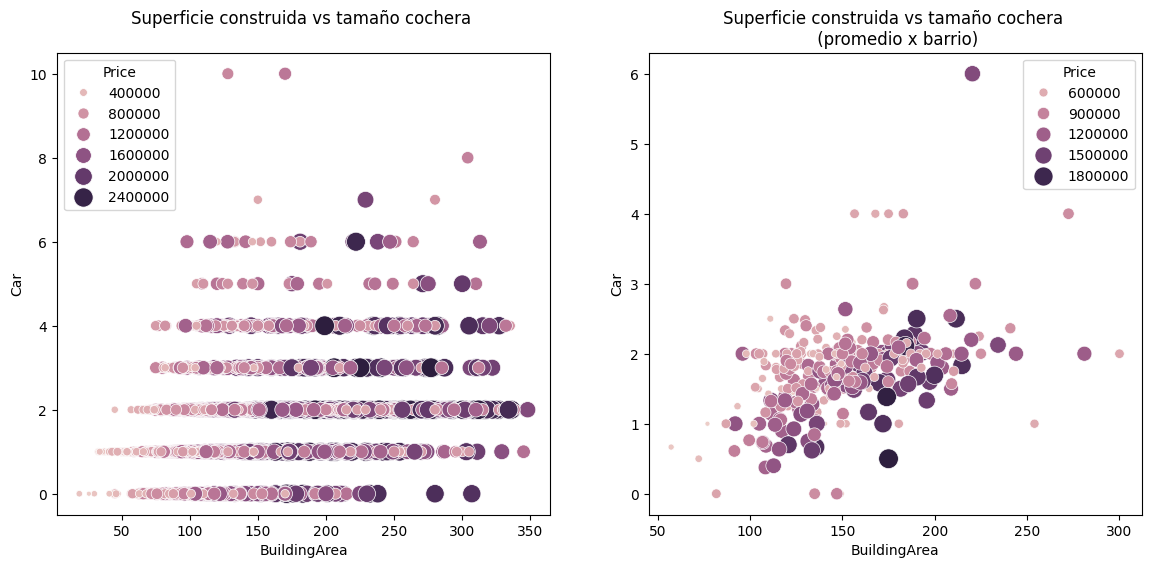

In [ ]:
#grafico Superficie construida vs Cantidad de autos (Cochera)
fig, axs = plt.subplots(figsize= [14, 6], ncols=2)

# Identifico variables
x = 'BuildingArea'
y = 'Car'
z = 'Price'

ax1 = sns.scatterplot(x=mb3[x], y= mb3[y], hue = mb3[z] , size=mb3[z], sizes=(10, 200), ax=axs[0]).set(title='Superficie construida vs tamaño cochera \n')
ax2 = sns.scatterplot(x=mb3.groupby('Suburb')[x].mean(), y= mb3.groupby('Suburb')[y].mean(),hue = mb3.groupby('Suburb')[z].mean() , size=mb3.groupby('Suburb')[z].mean(), sizes=(10, 200), ax=axs[1]).set(title='Superficie construida vs tamaño cochera \n (promedio x barrio)')

plt.savefig('Figura 6.3: Superficie construida, cochera y precio.png', dpi=fig.dpi)

### Barrio, precio, antigüedad y distancia al centro

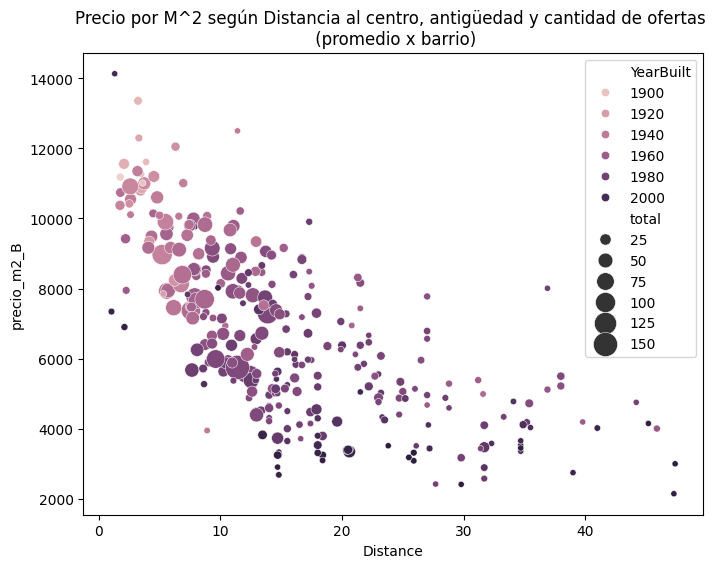

In [ ]:
#grafico Superficie construida vs Cantidad de habitaciones
fig, ax1 = plt.subplots(figsize= [8, 6], ncols=1)

# Identifico variables
x = 'Distance'
y = 'precio_m2_B'
z = 'YearBuilt'

ax1 = sns.scatterplot(x=mb3.groupby('Suburb')[x].mean(), y= mb3.groupby('Suburb')[y].mean(),
                      hue = mb3.groupby('Suburb')[z].mean(), legend="brief", size=mb3.groupby('Suburb')['total'].sum(), sizes=(20, 300),
                      ax=ax1).set(title='Precio por M^2 según Distancia al centro, antigüedad y cantidad de ofertas \n (promedio x barrio)')

plt.savefig('Figura 5.2: Precio por M^2 según Distancia al centro, antigüedad y cantidad de ofertas.png', dpi=fig.dpi)

**INSIGHT:** Si incorporamos al análisis el año de construcción, observamos que no solamente las viviendas en barrios más alejados tienen un precio menor en promedio, si no que también son mas recientes. Esto parece sugerir que la leve relación negativa observada entre el año de construcción  y el precio, es posiblemente una relación espúrea, producto del efecto de la mayor distancia. Es decir, es esperable que antigüedad de las viviendas siga un patrón de desarrollo urbano del centro hacia las perisferias. Esto hace que las viviendas mas alejadas sean más recientes y en zonas mas económicas (por M^2). La antiguedad no debiera ser entonces un factor que incida por si mismo en el precio, si no que da cuenta de la distancia al centro urbano y comercial.

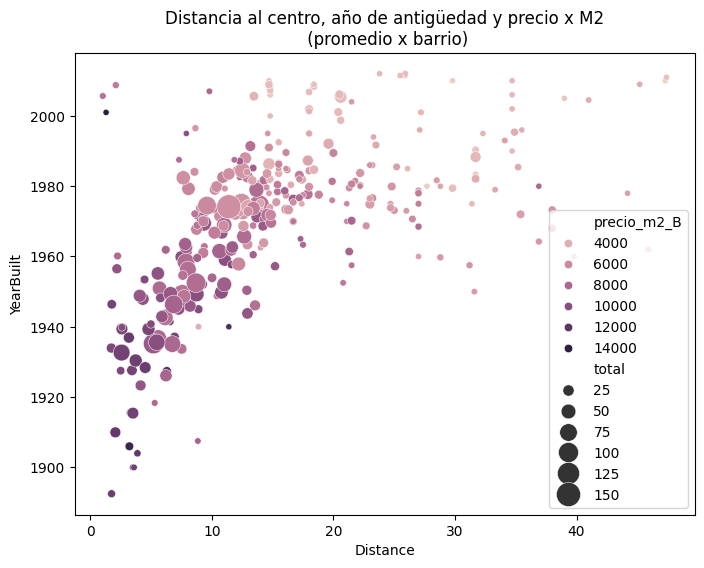

In [ ]:
#grafico Superficie construida vs Cantidad de habitaciones
fig, ax1 = plt.subplots(figsize= [8, 6], ncols=1)

# Identifico variables
x = 'Distance'
y = 'YearBuilt'
z = 'precio_m2_B'

ax1 = sns.scatterplot(x=mb3.groupby('Suburb')[x].mean(), y= mb3.groupby('Suburb')[y].mean(),
                      hue = mb3.groupby('Suburb')[z].mean(), legend="brief", size=mb3.groupby('Suburb')['total'].sum(), sizes=(20, 300),
                      ax=ax1).set(title='Distancia al centro, año de antigüedad y precio x M2\n (promedio x barrio)')

plt.savefig('Figura 5.3: Distancia al centro, año de antigüedad y precio x M2.png', dpi=fig.dpi)

In [ ]:
model2 = 'Distance~precio_m2_B'
resultado = sm.ols(formula = model2, data=mb3).fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     1794.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:15:15   Log-Likelihood:                -15932.
No. Observations:                5164   AIC:                         3.187e+04
Df Residuals:                    5162   BIC:                         3.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.7654      0.217     91.151      

# Resultados preliminares
De forma preliminar ya pueden observarse **algunas correlaciones existentes** entre el **precio de la propiedad y el tamaño**, tanto del lote como del edificio. Este se observa al analizar la distribución del precio x M2.

Otra relación se observa entre la **antigüedad de las viviendas y los precios**. Si bien tiene alta volatidad, en términos generales se observa un decenso en los precios cuanto mas nuevas son las viviendas. Esto puede estar relacionado con cambios en los patrones de edificación y/o puede estar mostrando una relación espúrea, influida en realidad por el crecimiento urbano (donde las viviendas mas nuevas son a la vez mas distantes del centro). Queda pendiente para próximas iteraciones explorar la interacción de estas variables y su efecto sobre precios.

La zona o barrio es una variable que al considerarse de forma agrupada si bien no muestra una relación estadísticamente significativa, la correlación negativa que muestra sugiere que mayor tamaño de los lotes tienen precios menores. Esto si bien a primera vista es contraintuitivo, en cierta medida es razonable, ya que a mayor distancia del centro, se incrementan los tamaños de los lotes.

Finalmente, de forma esperable, la **distancia al centro muestra una correlación negativa con el precio por Metro cuadrado** (tanto para el tamaño del lote como del edificio), es decir, las viviendas más alejadas del centro de la ciudad tienen precios por M2 son más bajos.


#Ingeniería de atributos

In [ ]:
#completo atributos faltantes

In [ ]:
crs_proyectado = 'EPSG:4203'

In [ ]:
#Imputar barrio vs CouncilArea

#Importo dataframe de barrios de airbnb
barrios_airbnb = gpd.read_file("neighbourhoods.geojson")
barrios_airbnb.head()

,neighbourhood,neighbourhood_group,geometry
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14171 -37.93137, 145.14255..."
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82279, 144.82654..."
2,Hume,None,"MULTIPOLYGON (((144.67239 -37.56778, 144.67128..."
3,Hobsons Bay,None,"MULTIPOLYGON (((144.90276 -37.84706, 144.90340..."
4,Kingston,None,"MULTIPOLYGON (((145.14171 -37.93137, 145.14190..."


In [ ]:
mb4 = gpd.GeoDataFrame(mb3,geometry=gpd.points_from_xy(x=mb3.Longitude, y=mb3.Latitude), crs=crs_proyectado)

In [ ]:
#Convierto en geodataframe e asigno barrio usando geojson de barrios de airbnb
# mb4 = gpd.GeoDataFrame(mb3,geometry=gpd.points_from_xy(x=mb3.Longitude, y=mb3.Latitude), crs=crs_proyectado)
# mb4 = gpd.sjoin(mb4, barrios_airbnb[['neighbourhood','geometry']].to_crs(crs_proyectado),predicate='intersects', how="left", op="within")
# mb4[['geometry','neighbourhood','CouncilArea']].sample(10)

In [ ]:
print(f"Casos faltantes en barrio \n Var original:{mb4['CouncilArea'].isna().sum()} \n Var Airbnb:{mb4['neighbourhood'].isna().sum()}")
mb4['Barrio'] = mb4['neighbourhood'].fillna(mb4['CouncilArea'])
print(f"Casos sin barrio (VF):{mb4['Barrio'].isna().sum()}")

Casos faltantes en barrio 
 Var original:578 
 Var Airbnb:6
Casos sin barrio (VF):1


In [ ]:
#Chequeo a ver como se comporta
# pd.crosstab(mb4.CouncilArea.fillna(99),mb4.neighbourhood.fillna(99))

In [ ]:
df = mb4

# Obtener los nombres únicos de los barrios
barrios_unicos = df['Barrio'].unique()

# Crear un mapa centrado en una ubicación inicial
mapa_barrios = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

folium.GeoJson(barrios_airbnb.geometry).add_to(mapa_barrios)

# Generar colores aleatorios para los barrios
colores_barrios = {barrio: '#{:06x}'.format(random.randint(0, 0xFFFFFF)) for barrio in barrios_unicos}

# Crear un cluster de marcadores
cluster = MarkerCluster().add_to(mapa_barrios)

# Iterar sobre las filas del dataframe y agregar marcadores al mapa
for index, row in df.iterrows():
    popup_content = f"<b>Barrio:</b> {row['Barrio']}<br>" \
                    f"<b>Distancia al centro:</b> {row['Distance']}<br>" \
                    f"<b>Tipo de vivienda:</b> {row['Type']}<br>" \
                    f"<b>Área construida:</b> {row['BuildingArea']} m^2<br>" \
                    f"<b>Tamaño del lote:</b> {row['Landsize']} m^2<br>" \
                    f"<b>Cantidad de cuartos:</b> {row['Rooms']}<br>" \
                    f"<b>Año de construcción:</b> {row['YearBuilt']}<br>" \
                    f"<b>Precio:</b> ${row['Price']}"
    folium.Marker([row['Latitude'], row['Longitude']],
                  icon=None,
                  popup=popup_content,
                  clustered_marker=True,
                  cluster_id=row['Suburb'],
                  ).add_to(cluster)

# mapa.save('mapa_nodos.html')

mapa_barrios

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Imputo valor "0" para los casos faltantes en la variable car
mb4['Car']=mb4['Car'].fillna(0)
print(f"Casos faltantes: {mb4['Car'].isna().sum()}")

Casos faltantes: 0


In [ ]:
#Clusters internos de concentración de oferta --> ver kaggle feature ingeniering

In [ ]:
#CREO UNA VARIABLE DE PRECIO PROMEDIO POR BARRIO DEL METRO CUADRADO CONSTRUIDO Y DE LOTE

promedio_por_barrio = mb4.groupby('neighbourhood')['precio_m2_B'].mean().reset_index()
promedio_por_barrio_L = mb4.groupby('neighbourhood')['precio_m2_L'].mean().reset_index()

# Fusionar el DataFrame de promedios con el GeoDataFrame de los límites de los barrios
gdf_barrios_con_precios = barrios_airbnb.merge(promedio_por_barrio, left_on='neighbourhood', right_on='neighbourhood', how='left')

# Crear el mapa
mapa_precios = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)

# Agregar la coropleta al mapa
folium.Choropleth(
    geo_data=gdf_barrios_con_precios,
    name='choropleth',
    data=gdf_barrios_con_precios,
    columns=['neighbourhood', 'precio_m2_B'],
    key_on='feature.properties.neighbourhood',
    fill_color= 'BuGn',#'viridis','YlGnBu'
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Precio promedio por metro cuadrado construido'
).add_to(mapa_precios)

# Añadir control de capas
folium.LayerControl().add_to(mapa_precios)

# Guardar el mapa
# mapa_precios.save('coropleta_precios_por_barrio.html')
mapa_precios

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Genero atributo de valor promedio del metro cuadrado en cada barrio
mb4 = mb4.merge(promedio_por_barrio.rename(columns={'precio_m2_B':'precio_promedio_m2_B'}), left_on='neighbourhood', right_on='neighbourhood', how='left')
mb4 = mb4.merge(promedio_por_barrio_L.rename(columns={'precio_m2_L':'precio_promedio_m2_L'}), left_on='neighbourhood', right_on='neighbourhood', how='left')
mb4.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,index_right,neighbourhood,Barrio,buffers,abnb_5,precio_m2_L,precio_m2_B,total,precio_promedio_m2_B,precio_promedio_m2_L
0,Abbotsford,25 Bloomburg St,2,House,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,9.0,Yarra,Yarra,"POLYGON ((144.99789155587496 -37.8079, 144.997...",55,6634.615385,13101.265823,1,10778.408695,7383.304787
1,Abbotsford,5 Charles St,3,House,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,9.0,Yarra,Yarra,"POLYGON ((144.99889155587496 -37.8093, 144.998...",62,10932.835821,9766.666667,1,10778.408695,7383.304787
2,Abbotsford,55a Park St,4,House,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,9.0,Yarra,Yarra,"POLYGON ((144.99859155587495 -37.8072, 144.998...",47,13333.333333,11267.605634,1,10778.408695,7383.304787
3,Abbotsford,124 Yarra St,3,House,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,9.0,Yarra,Yarra,"POLYGON ((145.00379155587495 -37.8024, 145.003...",46,7657.142857,8933.333333,1,10778.408695,7383.304787
4,Abbotsford,10 Valiant St,2,House,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,9.0,Yarra,Yarra,"POLYGON ((145.00339155587494 -37.801, 145.0033...",55,4986.363636,14626.666667,1,10778.408695,7383.304787


### Clustering

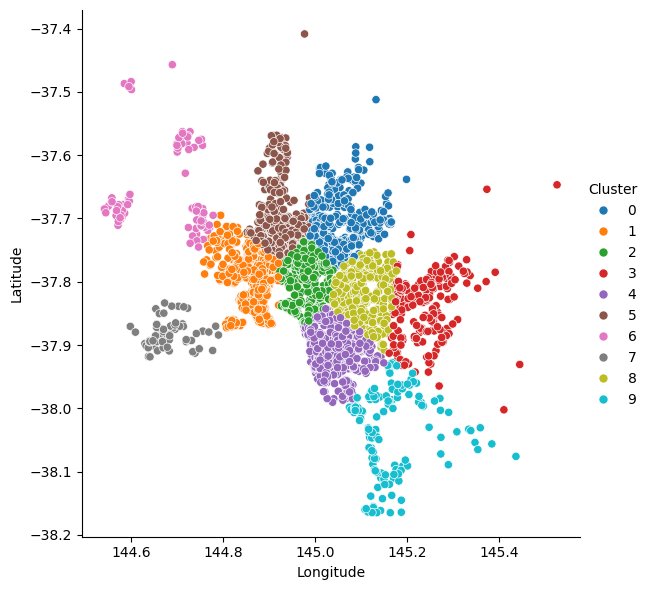

In [ ]:
from sklearn.cluster import KMeans

#Agrupo en Clusters las publicaciones utilizando la técnica de K-Means

kmeans = KMeans(n_clusters=10,max_iter=1000)
mb4["Cluster"] = kmeans.fit_predict(mb4[['Latitude', 'Longitude']])
mb4["Cluster"] = mb4["Cluster"].astype("category")

sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=mb4, height=6,
);

In [ ]:
mb4["Cluster"] = mb4["Cluster"].astype(str)

In [ ]:
#Buffers con cantidad de publicaciones de airbnb

In [ ]:
# abnb = pd.read_csv("listings.csv")
# abnb['alquiler_temporal'] = (abnb.minimum_nights > 0) & (abnb.minimum_nights <= 28)
# abnb = abnb.loc[(abnb['room_type'].isin(['Entire home/apt', 'Private room', 'Shared room'])) & (abnb['alquiler_temporal'])]
# abnb.dropna(axis=1, how="all",inplace=True)
# abnb.shape

In [ ]:
#Convierto en geodataframe
# abnb = gpd.GeoDataFrame(abnb,geometry=gpd.points_from_xy(x=abnb.longitude, y=abnb.latitude), crs=crs_proyectado)

In [ ]:
# from shapely.geometry import Point
# # from geopy.distance import geodesic
# from geopy.distance import distance

# radio_buffer = 500 / (111.32 * 1000)  # 111.32 km es la longitud aproximada de un grado de latitud

# #Creo un buffer que contenga la cantidad de publicaciones de airbnb
# mb4['buffers'] = mb4.to_crs(crs_proyectado).geometry.buffer(radio_buffer)

In [ ]:
#Vemos como quedan los buffers -

# prueba = mb4.iloc[0:100]
# m = folium.Map(location=[prueba.geometry.y.mean(), prueba.geometry.x.mean()], zoom_start=10)

# # Iterar sobre cada fila del GeoDataFrame
# for idx, row in prueba.iterrows():
#     # Agregar el punto al mapa
#     folium.Marker(location=[row.geometry.y, row.geometry.x]).add_to(m)
#     folium.Marker(location=[row.geometry.y, row.geometry.x]).add_to(m)

#     # Agregar el buffer al mapa con cierta transparencia
#     folium.GeoJson(row.buffers.__geo_interface__,
#                    style_function=lambda x: {'fillColor': '#3186cc', 'color': '#3186cc', 'weight': 1, 'fillOpacity': 0.3}
#                   ).add_to(m)

# # Mostrar el mapa
# m

In [ ]:
# %%time
# radio_buffer = 500 / (111.32 * 1000)  # 111.32 km es la longitud aproximada de un grado de latitud

# #Creo un buffer que contenga la cantidad de publicaciones de airbnb
# mb4['buffers'] = mb4.to_crs(crs_proyectado).geometry.buffer(radio_buffer)

# def contar_publicaciones(buffer, publicaciones):
#     return sum(buffer.intersects(geo) for geo in publicaciones.geometry)

# mb4['abnb_5'] = mb4['buffers'].apply(lambda x: contar_publicaciones(x, abnb.to_crs(crs_proyectado)))
# mb4['abnb_5'].value_counts()

In [ ]:
# mb4.to_csv("Melbourne housing prices - Buffers airbn.csv")

In [ ]:
#Calculamos el FOT (Factor de ocupacion total): Es el ratio
#Variable de ratio de superficie construida sobre el total del suelo (Area construida/ area total del suelo)
mb4['fot'] = mb4['BuildingArea'] / mb4['Landsize']
mb4['fot'].value_counts()

fot
1.000000    27
0.200000    12
0.500000    10
0.250000    10
0.363636     8
            ..
0.570707     1
0.208861     1
0.452880     1
0.534161     1
0.309392     1
Name: count, Length: 4699, dtype: int64

#Modelos de predicción

In [ ]:
#Creo una funcion para etiquetar dummies

def nombres_dummies(dataset,drop=True): #Defino nombre de funcion y parámetros
  s = (dataset.dtypes == 'object')   #Listo variables objeto
  object_cols = list(s[s].index)

  for col in object_cols: #Corro un for loop para cada item en la lista
    dummies = pd.get_dummies(dataset[col], prefix=f"Dm_{col}") #Corro get_dummies para cada variable
    dataset = pd.concat([dataset, dummies], axis=1) #Concateno las variables nuevas
    if drop==True: #Elimino variables originales
      dataset.drop(col, axis=1, inplace=True)

  return dataset # Devuelvo el dataset

In [ ]:
#Importo librerías para preparar y evaluar los datos
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#elijo las características que voy a utilizar en el modelo
data = mb4[['Suburb', 'Rooms', 'Type',
        'Distance','Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea','fot', 'YearBuilt', 'Barrio',
       'Latitude', 'Longitude', 'Regionname','precio_promedio_m2_B','precio_promedio_m2_L',#'Cluster',
        'abnb_5','Price']]

data = data.dropna()  #Elimino casos con datos faltantes
data.shape

(5158, 19)

In [ ]:
#Separo la variable target/objetivo
X = nombres_dummies(data.drop(['Price'], axis=1))
y = data['Price']

#Dividio en train y test con una proporción de 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=724)
print("Encoding listo. usar dfs:\nX_train, X_test, y_train, y_test")

Encoding listo. usar dfs:
X_train, X_test, y_train, y_test


In [ ]:
# Normalizando los datos excluyendo laltitud y longitud
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Selección del modelo

In [ ]:
#Creo una tabla resumen para comparar modelos

#Genero un DF con las variables que quiero trackear en cada modelo
resumen_datos=pd.DataFrame({'Nombre':[],'modelo':[],'caracteristicas':[],'n_vars':[],'MAE':[],'MSE':[],'R2':[],'MAPE':[],'P_error':[]})
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error


In [ ]:
# #Defino las características del modelo
pd.set_option('display.float_format', lambda x: '%.2f' % x)

nombre = 'M1'

descripcion = '''Modelo Básico. Incluye todas las variables propias + atributos geo y nuevos atributos. No considera clusters'''

# encoding= 'OHE'

# #Variables a utilizar
cols_M = ['Suburb', 'Rooms', 'Type',
        'Distance','Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea','fot', 'YearBuilt', 'Barrio',
       'Latitude', 'Longitude', 'Regionname','precio_promedio_m2_B','precio_promedio_m2_L',#'Cluster',
        'abnb_5','Price']


# # Variable objetivo
# var_obj = 'Price'

#Genero la fila para incorporar al benchmark

modelo = 'KNN Regressor'

resumen_datos = resumen_datos._append(pd.Series([nombre,modelo,descripcion,len(cols_M)-1],index=['Nombre','modelo', 'caracteristicas','n_vars']), ignore_index=True)
resumen_datos.head()

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Instancio el modelo
knn_model = KNeighborsRegressor()

knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

199993.9176857906

In [ ]:
test_preds = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

251275.07965855

In [ ]:
#Optimizo el modelo usando gridserhc, para encontrar el nro correcto de K
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters, verbose= 3)
gridsearch.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.582 total time=   0.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.626 total time=   0.1s
[CV 3/5] END .....................n_neighbors=1;, score=0.604 total time=   0.1s
[CV 4/5] END .....................n_neighbors=1;, score=0.662 total time=   0.1s
[CV 5/5] END .....................n_neighbors=1;, score=0.639 total time=   0.1s
[CV 1/5] END .....................n_neighbors=2;, score=0.622 total time=   0.1s
[CV 2/5] END .....................n_neighbors=2;, score=0.673 total time=   0.1s
[CV 3/5] END .....................n_neighbors=2;, score=0.616 total time=   0.1s
[CV 4/5] END .....................n_neighbors=2;, score=0.732 total time=   0.1s
[CV 5/5] END .....................n_neighbors=2;, score=0.715 total time=   0.1s
[CV 1/5] END .....................n_neighbors=3;, score=0.638 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)}, verbose=3)

In [ ]:
print("Mejores parámetros:")
gridsearch.best_params_

Mejores parámetros:


{'n_neighbors': 4}

In [ ]:
#Entreno el modelo con los mejores parámetros identificados
knn_model = KNeighborsRegressor(n_neighbors=gridsearch.best_params_['n_neighbors'])

knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
train_preds = knn_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

187328.62783835985

In [ ]:
test_preds = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

249133.8373419097

In [ ]:
r2 = r2_score(y_test, test_preds)
print(f"R2: {r2}")

R2: 0.6975816375102877


In [ ]:
mape = mean_absolute_percentage_error(y_test, test_preds)
print("MAPE:", mape)

MAPE: 20.08437596240293


In [ ]:
mae = mean_absolute_error(test_preds, y_test)
P_error = round(mae / data.Price.mean() * 100,2)
print(f"Porcentaje de error promedio en la estimación: {P_error}%")

Porcentaje de error promedio en la estimación: 17.36%


In [ ]:
#Cargo los resultados
resumen_datos.loc[(resumen_datos['Nombre']==nombre) & (resumen_datos['modelo']==modelo),['MAE','MSE','R2','MAPE','P_error']] = mae,mse,r2,mape,P_error
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36


### Decision tree regressor

In [ ]:
# Creo fila para el modelo

modelo = 'Decision Tree'
resumen_datos = resumen_datos._append(pd.Series([nombre,modelo,descripcion,len(cols_M)-1],index=['Nombre','modelo', 'caracteristicas','n_vars']), ignore_index=True)
resumen_datos.head()

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=724)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=724)

# Entreno Modelo
model.fit(X_train, y_train)

# Make validation predictions and calculate mean absolute error
val_predictions = model.predict(X_test)
val_mae = mean_absolute_error(val_predictions, y_test)
print(f"Validation MAE when not specifying max_leaf_nodes: {round(val_mae,1)} ")
print(f"Porcentaje de error promedio en la estimación: {round(val_mae / data.Price.mean() * 100,2)}%")




Validation MAE when not specifying max_leaf_nodes: 174954.3 
Porcentaje de error promedio en la estimación: 16.91%


In [ ]:
model = DecisionTreeRegressor(random_state=724)

# Entreno Modelo
model.fit(X_train_scaled, y_train)

# Make validation predictions and calculate mean absolute error
val_predictions = model.predict(X_test_scaled)

mae = mean_absolute_error(val_predictions, y_test)
P_error = round(mae / data.Price.mean() * 100,2)

mse = mean_squared_error(y_test, val_predictions)
print(f"MSE: {mse}")

mape = mean_absolute_percentage_error(y_test, val_predictions)
print("MAPE:", mape)

r2 = r2_score(y_test, val_predictions)
print(f"R2: {r2}")

print(f"Validation MAE when not specifying max_leaf_nodes: {round(mae,1)} ")
print(f"Porcentaje de error promedio en la estimación: {P_error}%")

MSE: 62899474426.98934
MAPE: 17.432116569496802
R2: 0.6935287502797485
Validation MAE when not specifying max_leaf_nodes: 174956.2 
Porcentaje de error promedio en la estimación: 16.91%


In [ ]:
# for max_leaf_nodes in [5, 10, 50, 100, 500, 1000, 5000]:
#     my_mae = get_mae(max_leaf_nodes, X_train_scaled, X_test_scaled, y_train, y_test)
#     print(f"Max leaf nodes: {max_leaf_nodes}  \t\t Mean Absolute Error:  {round(my_mae,1)}  \t\t Error promedio: {round(my_mae / data.Price.mean() * 100,2)}%")

In [ ]:
#Cargo los resultados del modelo
resumen_datos.loc[(resumen_datos['Nombre']==nombre) & (resumen_datos['modelo']==modelo),['MAE','MSE','R2','MAPE','P_error']] = mae,mse,r2,mape,round(P_error,2)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91


### Random Forest Regressor

In [ ]:
# Creo fila para el modelo

modelo = 'Random Forest'
resumen_datos = resumen_datos._append(pd.Series([nombre,modelo,descripcion,len(cols_M)-1],index=['Nombre','modelo', 'caracteristicas','n_vars']), ignore_index=True)
resumen_datos.head()

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
# Define the model. Set random_state to 724
rf_model = RandomForestRegressor(random_state=724)

# fit your model
rf_model.fit(X_train,y_train)

# Calculo el error absoluto promedio
rf_val_predictions = rf_model.predict(X_test)
rf_val_mae = mean_absolute_error(y_test, rf_model.predict(X_test))

print("Validation MAE for Random Forest Model: {}".format(round(rf_val_mae,1)))
print(f"Porcentaje de error promedio en la estimación (Train): {round(mean_absolute_error(y_train, rf_model.predict(X_train)) / data.Price.mean() * 100,2)}%")
print(f"Porcentaje de error promedio en la estimación (Test): {round(rf_val_mae / data.Price.mean() * 100,2)}%")

Validation MAE for Random Forest Model: 120013.5
Porcentaje de error promedio en la estimación (Train): 4.83%
Porcentaje de error promedio en la estimación (Test): 11.6%
CPU times: user 8.19 s, sys: 16.5 ms, total: 8.21 s
Wall time: 8.28 s


In [ ]:
# Calcular el error cuadrático medio (MSE) para el conjunto de entrenamiento y de prueba

# Realizar predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calcular sesgo y varianza
train_bias = np.mean((y_train_pred - y_train) ** 2)
train_var = np.var(y_train_pred)

test_bias = np.mean((y_test_pred - y_test) ** 2)
test_var = np.var(y_test_pred)

print("Conjunto de entrenamiento:")
print("Sesgo:", train_bias)
print("Varianza:", train_var)
print("Error cuadrático medio:", train_mse)

print("\nConjunto de prueba:")
print("Sesgo:", test_bias)
print("Varianza:", test_var)
print("Error cuadrático medio:", test_mse)

Conjunto de entrenamiento:
Sesgo: 5058232087.568927
Varianza: 191518603533.74115
Error cuadrático medio: 5058232087.568927

Conjunto de prueba:
Sesgo: 27355302095.99729
Varianza: 172945768867.94397
Error cuadrático medio: 27355302095.99729


In [ ]:
#Evaluamos la importancia(Peso explicativo) de las variables)
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": rf_model.feature_importances_}
    ).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df.head(15)

,feature,importance
6,BuildingArea,0.34
11,precio_promedio_m2_B,0.22
8,YearBuilt,0.13
9,Latitude,0.05
5,Landsize,0.04
1,Distance,0.04
12,precio_promedio_m2_L,0.04
10,Longitude,0.03
7,fot,0.02
13,abnb_5,0.02


In [ ]:
# Define the model.
rf_model = RandomForestRegressor(random_state=724)

# fit your model
rf_model.fit(X_train_scaled,y_train)

# Calculo el error absoluto promedio
rf_val_predictions = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_model.predict(X_test_scaled))

test_mse = mean_squared_error(y_test, rf_val_predictions)
print(f"MSE: {test_mse}")

r2 = r2_score(y_test, rf_val_predictions)
print(f"R2: {r2}")

mape = mean_absolute_percentage_error(y_test, rf_val_predictions)
print("MAPE:", mape)

P_error = round(mae / data.Price.mean() * 100,2)

print("Validation MAE for Random Forest Model: {}".format(round(mae,1)))
print(f"Porcentaje de error promedio en la estimación: {P_error}%")

MSE: 27394651122.348816
R2: 0.866522366973641
MAPE: 12.152503124695516
Validation MAE for Random Forest Model: 120118.4
Porcentaje de error promedio en la estimación: 11.61%


In [ ]:
# Validation MAE for Random Forest Model: 139673.5
# Porcentaje de error promedio en la estimación: 13.51%

In [ ]:
#Evaluamos la importancia(Peso explicativo) de las variables)
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": rf_model.feature_importances_}
    ).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df.head(15)

,feature,importance
6,BuildingArea,0.34
11,precio_promedio_m2_B,0.22
8,YearBuilt,0.13
9,Latitude,0.05
5,Landsize,0.04
1,Distance,0.04
10,Longitude,0.03
12,precio_promedio_m2_L,0.03
7,fot,0.02
13,abnb_5,0.02


In [ ]:
#Cargo los resultados del modelo
resumen_datos.loc[(resumen_datos['Nombre']==nombre) & (resumen_datos['modelo']==modelo),['MAE','MSE','R2','MAPE','P_error']] = mae,mse,r2,mape,round(P_error,2)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61


### XGBOOST

In [ ]:
# Creo fila para el modelo

modelo = 'XGBOOST'
resumen_datos = resumen_datos._append(pd.Series([nombre,modelo,descripcion,len(cols_M)-1],index=['Nombre','modelo', 'caracteristicas','n_vars']), ignore_index=True)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold,GridSearchCV
from xgboost import XGBRegressor

In [ ]:
# Definir el modelo XGBoost para regresión
xg_model = XGBRegressor(random_state=724)


xg_model.fit(X_train,y_train)
xg_val_predictions = xg_model.predict(X_test)
mae = mean_absolute_error(y_test, xg_model.predict(X_test))

# Calcular el promedio del MAE (se utiliza neg_mean_absolute_error ya que cross_val_score maximiza la métrica)
P_error = round(mae / data.Price.mean() * 100,2)

mse = mean_squared_error(y_test, xg_val_predictions)
print(f"MSE: {test_mse}")

r2 = r2_score(y_test, xg_val_predictions)
print(f"R2: {r2}")

mape = mean_absolute_percentage_error(y_test, xg_val_predictions)
print("MAPE:", mape)

print(f"Validation MAE for XGBoost regresor: {round(mae,1)}")
print(f"Porcentaje de error promedio en la estimación: {P_error}%")

MSE: 27394651122.348816
R2: 0.8637512536931522
MAPE: 12.13927491098808
Validation MAE for XGBoost regresor: 119753.8
Porcentaje de error promedio en la estimación: 11.57%


In [ ]:
#Validation MAE for XGBoost regresor: 139864.8
# Porcentaje de error promedio en la estimación: 13.52% (anterior)

In [ ]:
#Cargo los resultados del modelo
resumen_datos.loc[(resumen_datos['Nombre']==nombre) & (resumen_datos['modelo']==modelo),['MAE','MSE','R2','MAPE','P_error']] = mae,mse,r2,mape,round(P_error,2)
resumen_datos.to_excel("Tabla provisoria modelos sin optimizar.xlsx")
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57


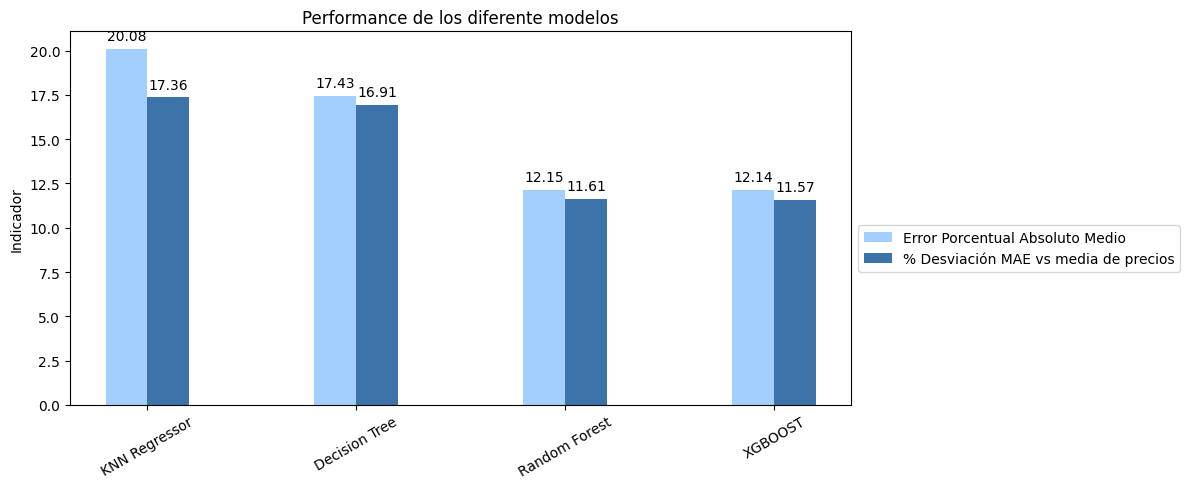

In [ ]:
# Obtener los valores y los nombres de los modelos
modelos = resumen_datos['modelo']
indicadores = ['MAPE','P_error']

# Configuración de barras múltiples
num_barras = len(modelos)
ancho_barras = 0.2
indice = np.arange(num_barras)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12,5))
colores = ['#a2cffe',#'#75bbfd',
           '#3c73a9']
for i, (indicador, color) in enumerate(zip(indicadores, colores)):
    ax.bar(indice + i * ancho_barras, resumen_datos[indicador], ancho_barras, label=indicador,
           color = color)

# Configurar etiquetas y leyendas
ax.set_ylabel('Indicador')
ax.set_title('Performance de los diferente modelos')
ax.set_xticks(indice + ancho_barras * (len(indicadores) - 1) / 2)
ax.set_xticklabels(modelos, rotation=30)
ax.legend(['Error Porcentual Absoluto Medio','% Desviación MAE vs media de precios'],
          loc='best', bbox_to_anchor=(1, 0.5))

# Agregar etiquetas de valores
for i, indicador in enumerate(indicadores):
    for j, valor in enumerate(resumen_datos[indicador]):
        ax.text(j + i * ancho_barras, valor + 0.5, str(round(valor,2)), ha='center')

# Mostrar el gráfico
plt.tight_layout()
# plt.savefig('Figura xx: Performance de los modelos (1) .png', dpi=fig.dpi)
plt.show()

## RESUTADOS PROVISORIOS Y SELECCION DE MODELO

Al cabo de una primera iteracion **pre-seleccionamos** dos modelos para **optimizar hiperparámetros**, siendo los que tienen el menor error medio absoluto (MAE) y el % de variación que tiene con respecto al precio promedio: **Random Forest** y **XGBOOST**.

# Mejoras del modelo

## Reducción de dimensionalidad: Análisis de Componentes Principales (PCA)

In [ ]:
nombre = 'M2'

descripcion = '''PCA'''

#Genero la fila para incorporar al benchmark

modelo = 'Random Forest -PCA'

resumen_datos = resumen_datos._append(pd.Series([nombre,modelo,descripcion,len(cols_M)-1],index=['Nombre','modelo', 'caracteristicas','n_vars']), ignore_index=True)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57
4,M2,Random Forest -PCA,PCA,18.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Construyo componentes principales

pca = PCA(random_state=724)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
explained_variance.mean()

0.002857142857142857

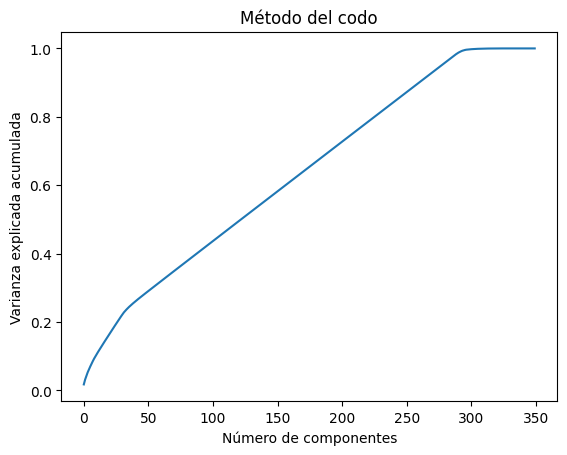

Número óptimo de componentes para explicar al menos el 95.0% de la varianza: 278


In [ ]:
# Método del codo
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Método del codo')
plt.show()

# Método de la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)
threshold = 0.95 # Por ejemplo, elige el 95% de varianza explicada como umbral
n_components = np.argmax(cumulative_variance >= threshold) + 1

print(f'Número óptimo de componentes para explicar al menos el {threshold*100}% de la varianza: {n_components}')

In [ ]:
pca = PCA(random_state=724,n_components=277)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
explained_variance.mean()

0.0034222015473109697

In [ ]:
%%time
# Define the model. Set random_state to 724
rf_model_pca = RandomForestRegressor(random_state=724)

# fit your model
rf_model_pca.fit(X_train_pca,y_train)

# Calculo el error absoluto promedio
rf_val_predictions_pca = rf_model_pca.predict(X_valid_pca)
mae = mean_absolute_error(y_test, rf_val_predictions_pca)

mse = mean_squared_error(y_test, rf_val_predictions_pca)
print(f"MSE: {mse}")

r2 = r2_score(y_test, rf_val_predictions_pca)
print(f"R2: {r2}")

mape = mean_absolute_percentage_error(y_test, rf_val_predictions_pca)
print("MAPE:", mape)

P_error = round(mae / data.Price.mean() * 100,2)

print("Validation MAE for Random Forest Model: {}".format(round(mae,1)))
print(f"Porcentaje de error promedio en la estimación: {P_error}%")

MSE: 40347061729.905975
R2: 0.803413072310209
MAPE: 15.26355333634442
Validation MAE for Random Forest Model: 146331.4
Porcentaje de error promedio en la estimación: 14.14%
CPU times: user 1min 28s, sys: 186 ms, total: 1min 28s
Wall time: 1min 31s


In [ ]:
#Cargo los resultados del modelo
resumen_datos.loc[(resumen_datos['Nombre']==nombre) & (resumen_datos['modelo']==modelo),['MAE','MSE','R2','MAPE','P_error']] = mae,mse,r2,mape,round(P_error,2)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57
4,M2,Random Forest -PCA,PCA,18.00,146331.43,40347061729.91,0.80,15.26,14.14


In [ ]:
nombre = 'M2'

descripcion = '''PCA'''

#Genero la fila para incorporar al benchmark

modelo = 'XGBOOST -PCA'

resumen_datos = resumen_datos._append(pd.Series([nombre,modelo,descripcion,len(cols_M)-1],index=['Nombre','modelo', 'caracteristicas','n_vars']), ignore_index=True)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57
4,M2,Random Forest -PCA,PCA,18.00,146331.43,40347061729.91,0.80,15.26,14.14
5,M2,XGBOOST -PCA,PCA,18.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Definir el modelo XGBoost para regresión
xg_model = XGBRegressor(random_state=724)

xg_model.fit(X_train_pca,y_train)
xg_val_predictions = xg_model.predict(X_valid_pca)
mae = mean_absolute_error(y_test, xg_model.predict(X_valid_pca))

# Calcular el promedio del MAE (se utiliza neg_mean_absolute_error ya que cross_val_score maximiza la métrica)
P_error = round(mae / data.Price.mean() * 100,2)

mse = mean_squared_error(y_test, xg_val_predictions)
print(f"MSE: {test_mse}")

r2 = r2_score(y_test, xg_val_predictions)
print(f"R2: {r2}")

mape = mean_absolute_percentage_error(y_test, xg_val_predictions)
print("MAPE:", mape)

print(f"Validation MAE for XGBoost regresor: {round(mae,1)}")
print(f"Porcentaje de error promedio en la estimación: {P_error}%")

MSE: 27394651122.348816
R2: 0.8082172832528479
MAPE: 14.982086356960785
Validation MAE for XGBoost regresor: 145028.6
Porcentaje de error promedio en la estimación: 14.02%


In [ ]:
#Cargo los resultados del modelo
resumen_datos.loc[(resumen_datos['Nombre']==nombre) & (resumen_datos['modelo']==modelo),['MAE','MSE','R2','MAPE','P_error']] = mae,mse,r2,mape,round(P_error,2)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57
4,M2,Random Forest -PCA,PCA,18.00,146331.43,40347061729.91,0.80,15.26,14.14
5,M2,XGBOOST -PCA,PCA,18.00,145028.56,39361056211.92,0.81,14.98,14.02


La aplicación de reduccion de dimensionalidad mediante PCA empeora la performance del modelo y no genera una mejora en el tiempo de procesamiento. Por lo tanto, **no se incluye en el modelo.**

## Optimización de hiperparámetros y validación cruzada

Utilizo Halving gridsearch para optimizar los hiperparámetros de los modelos seleccionados y aplicamos crossvalidation .

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import  StratifiedKFold

In [ ]:
# Definir la estrategia de validación cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=724)

### Random Forest

In [ ]:
nombre = 'M3'

descripcion = '''Crosvalidation y parámetros optimizados con Halving Grid Search'''

#Genero la fila para incorporar al benchmark

modelo = 'Random Forest - Tunned'

resumen_datos = resumen_datos._append(pd.Series([nombre,modelo,descripcion,len(cols_M)-1],index=['Nombre','modelo', 'caracteristicas','n_vars']), ignore_index=True)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57
4,M2,Random Forest -PCA,PCA,18.00,146331.43,40347061729.91,0.80,15.26,14.14
5,M2,XGBOOST -PCA,PCA,18.00,145028.56,39361056211.92,0.81,14.98,14.02
6,M3,Random Forest - Tunned,Crosvalidation y parámetros optimizados con Ha...,18.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
rf_model = RandomForestRegressor(random_state=724)

param_grid = {
        'n_estimators': [100,200,300,400],
        'min_samples_leaf': [1,5,10],
        # 'max_depth': [3, 5, 7,9]
    }

halving_cv = HalvingGridSearchCV(rf_model, param_grid,cv=stratified_kfold, scoring="neg_mean_absolute_error", n_jobs=-1,verbose=1,random_state=724)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", -halving_cv.best_score_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 458
max_resources_: 4126
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12
n_resources: 458
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 4
n_resources: 1374
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 4122
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores parametros {'min_samples_leaf': 1, 'n_estimators': 400}
Mejor Score CV 136363.602656932
CPU times: user 34.4 s, sys: 761 ms, total: 35.1 s
Wall time: 5min 38s


In [ ]:
halving_cv.best_params_

{'min_samples_leaf': 1, 'n_estimators': 400}

In [ ]:
%%time
# Define the model. Set random_state to 724
rf_model = RandomForestRegressor(random_state=724, n_estimators=halving_cv.best_params_['n_estimators'],
        min_samples_leaf = halving_cv.best_params_['min_samples_leaf'],#max_depth = halving_cv.best_params_['max_depth']
                                 )

# fit your model
rf_model.fit(X_train,y_train)

# Calculo el error absoluto promedio
rf_val_predictions = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, rf_model.predict(X_test))

test_mse = mean_squared_error(y_test, rf_val_predictions)
print(f"MSE: {test_mse}")

r2 = r2_score(y_test, rf_val_predictions)
print(f"R2: {r2}")

mape = mean_absolute_percentage_error(y_test, rf_val_predictions)
print("MAPE:", mape)


P_error = round(mae / data.Price.mean() * 100,2)

print("Validation MAE for Random Forest Model: {}".format(round(mae,1)))
print(f"Porcentaje de error promedio en la estimación (Train): {round(mean_absolute_error(y_train, rf_model.predict(X_train)) / data.Price.mean() * 100,2)}%")
print(f"Porcentaje de error promedio en la estimación (Test): {P_error}%")

MSE: 26958518593.17462
R2: 0.8686473780723398
MAPE: 12.058308963072234
Validation MAE for Random Forest Model: 119339.7
Porcentaje de error promedio en la estimación (Train): 4.8%
Porcentaje de error promedio en la estimación (Test): 11.53%
CPU times: user 30.2 s, sys: 95.4 ms, total: 30.3 s
Wall time: 30.4 s


In [ ]:
#Cargo los resultados del modelo
resumen_datos.loc[(resumen_datos['Nombre']==nombre) & (resumen_datos['modelo']==modelo),['MAE','MSE','R2','MAPE','P_error']] = mae,mse,r2,mape,round(P_error,2)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57
4,M2,Random Forest -PCA,PCA,18.00,146331.43,40347061729.91,0.80,15.26,14.14
5,M2,XGBOOST -PCA,PCA,18.00,145028.56,39361056211.92,0.81,14.98,14.02
6,M3,Random Forest - Tunned,Crosvalidation y parámetros optimizados con Ha...,18.00,119339.66,39361056211.92,0.87,12.06,11.53


In [ ]:
# Calcular el error cuadrático medio (MSE) para el conjunto de entrenamiento y de prueba

# Realizar predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calcular sesgo y varianza
train_bias = np.mean((y_train_pred - y_train) ** 2)
train_var = np.var(y_train_pred)

test_bias = np.mean((y_test_pred - y_test) ** 2)
test_var = np.var(y_test_pred)

print("Conjunto de entrenamiento:")
print("Sesgo:", train_bias)
print("Varianza:", train_var)
print("Error cuadrático medio:", train_mse)

print("\nConjunto de prueba:")
print("Sesgo:", test_bias)
print("Varianza:", test_var)
print("Error cuadrático medio:", test_mse)

Conjunto de entrenamiento:
Sesgo: 4954689813.728588
Varianza: 191177872411.60382
Error cuadrático medio: 4954689813.728588

Conjunto de prueba:
Sesgo: 26958518593.17462
Varianza: 171471560985.47836
Error cuadrático medio: 26958518593.17462


In [ ]:
#Evaluamos la importancia(Peso explicativo) de las variables)
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": rf_model.feature_importances_}
    ).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df.head(20)

,feature,importance
6,BuildingArea,0.34
11,precio_promedio_m2_B,0.22
8,YearBuilt,0.13
9,Latitude,0.05
1,Distance,0.04
5,Landsize,0.04
12,precio_promedio_m2_L,0.03
10,Longitude,0.03
7,fot,0.02
13,abnb_5,0.02


Text(0.5, 1.0, 'Random Forest: Atributos con mayor peso explicativo del modelo')

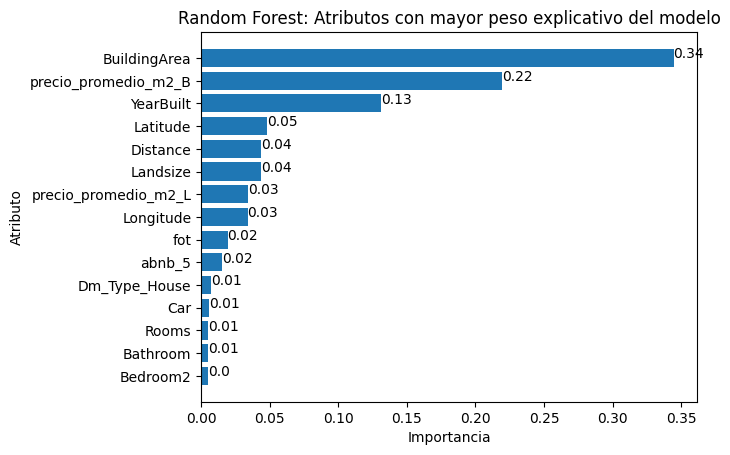

In [ ]:
seleccion = feature_importances_df[0:15].sort_values(by='importance', ascending=True)
plt.barh(seleccion['feature'], seleccion['importance'])

for index, value in enumerate(seleccion['importance']):
    plt.text(value, index, str(round(value,2)))

plt.xlabel('Importancia')
plt.ylabel('Atributo')
plt.savefig('Figura xx: Importancia Atributos Random Forest.png', dpi=fig.dpi)
plt.title('Random Forest: Atributos con mayor peso explicativo del modelo')

### XGBoost

In [ ]:
# Creo fila para el modelo

modelo = 'XGBOOST - Tunned'
resumen_datos = resumen_datos._append(pd.Series([nombre,modelo,descripcion,len(cols_M)-1],index=['Nombre','modelo', 'caracteristicas','n_vars']), ignore_index=True)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57
4,M2,Random Forest -PCA,PCA,18.00,146331.43,40347061729.91,0.80,15.26,14.14
5,M2,XGBOOST -PCA,PCA,18.00,145028.56,39361056211.92,0.81,14.98,14.02
6,M3,Random Forest - Tunned,Crosvalidation y parámetros optimizados con Ha...,18.00,119339.66,39361056211.92,0.87,12.06,11.53
7,M3,XGBOOST - Tunned,Crosvalidation y parámetros optimizados con Ha...,18.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57
4,M2,Random Forest -PCA,PCA,18.00,146331.43,40347061729.91,0.80,15.26,14.14
5,M2,XGBOOST -PCA,PCA,18.00,145028.56,39361056211.92,0.81,14.98,14.02
6,M3,Random Forest - Tunned,Crosvalidation y parámetros optimizados con Ha...,18.00,119339.66,39361056211.92,0.87,12.06,11.53
7,M3,XGBOOST - Tunned,Crosvalidation y parámetros optimizados con Ha...,18.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Utilizo Halving gridsearch para optimizar hiperparámetros

xg_model = XGBRegressor(random_state=724)

param_grid = {
        'n_estimators': [50,100, 200, 300,400],
        'learning_rate': [0.01, 0.05, 0.1],
        # 'max_depth': [3, 5, 7]
    }

halving_cv = HalvingGridSearchCV(xg_model, param_grid,cv=stratified_kfold, scoring="neg_mean_absolute_error", n_jobs=-1,verbose=1,random_state=724)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", -halving_cv.best_score_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 458
max_resources_: 4126
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 458
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 5
n_resources: 1374
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 2
n_candidates: 2
n_resources: 4122
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores parametros {'learning_rate': 0.1, 'n_estimators': 400}
Mejor Score CV 131362.81619902453


In [ ]:
xg_model = XGBRegressor(random_state=724)

param_grid = {
        'n_estimators': [300,350, 400, 450,500],
        'learning_rate': [0.05, 0.1,0.15],
        # 'max_depth': [3, 5, 7]
    }

halving_cv = HalvingGridSearchCV(xg_model, param_grid,cv=stratified_kfold, scoring="neg_mean_absolute_error", n_jobs=-1,verbose=1,random_state=724)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", -halving_cv.best_score_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 458
max_resources_: 4126
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 458
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 5
n_resources: 1374
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 2
n_candidates: 2
n_resources: 4122
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores parametros {'learning_rate': 0.1, 'n_estimators': 450}
Mejor Score CV 131382.272415568


In [ ]:
# Definir el modelo XGBoost para regresión
xg_model = XGBRegressor(random_state=724,learning_rate= halving_cv.best_params_['learning_rate'], n_estimators= halving_cv.best_params_['n_estimators'])

# Definir la estrategia de validación cruzada estratificada
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=724)

xg_model.fit(X_train, y_train)

# Realizar la validación cruzada estratificada

xg_val_predictions = xg_model.predict(X_test)
mae = mean_absolute_error(y_test, xg_model.predict(X_test))


# Calcular el promedio del MAE (se utiliza neg_mean_absolute_error ya que cross_val_score maximiza la métrica)
P_error = round(mae / data.Price.mean() * 100,2)

mse = mean_squared_error(y_test, xg_val_predictions)
print(f"MSE: {test_mse}")

r2 = r2_score(y_test, xg_val_predictions)
print(f"R2: {r2}")

mape = mean_absolute_percentage_error(y_test, xg_val_predictions)
print("MAPE:", mape)

print(f"Validation MAE for XGBoost regresor: {round(mae,1)}")
print(f"Porcentaje de error promedio en la estimación: {P_error}%")

MSE: 26958518593.17462
R2: 0.8756016811906316
MAPE: 11.772767184063664
Validation MAE for XGBoost regresor: 116276.4
Porcentaje de error promedio en la estimación: 11.24%


In [ ]:
#Evaluamos la importancia(Peso explicativo) de las variables)
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": xg_model.feature_importances_}
    ).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df.head(20)

,feature,importance
11,precio_promedio_m2_B,0.23
6,BuildingArea,0.06
347,Dm_Regionname_Southern Metropolitan,0.04
311,Dm_Type_Unit,0.03
8,YearBuilt,0.03
309,Dm_Type_House,0.02
12,precio_promedio_m2_L,0.02
314,Dm_Barrio_Boroondara,0.01
235,Dm_Suburb_Prahran,0.01
342,Dm_Regionname_Eastern Metropolitan,0.01


In [ ]:
feature_importances_df.columns.values

array(['feature', 'importance'], dtype=object)

Text(0.5, 1.0, 'XGBOOST: Atributos con mayor peso explicativo del modelo')

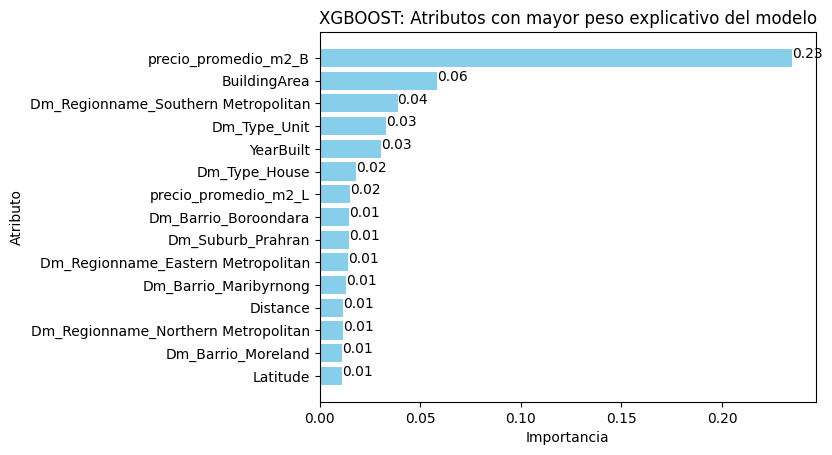

In [ ]:
seleccion = feature_importances_df[0:15].sort_values(by='importance', ascending=True)
color = 'skyblue'

plt.barh(seleccion['feature'], seleccion['importance'], color=color)

for index, value in enumerate(seleccion['importance']):
    plt.text(value, index, str(round(value,2)))


plt.xlabel('Importancia')
plt.ylabel('Atributo')
plt.savefig('Figura xx: Importancia Atributos XGBOOST.png', dpi=fig.dpi)
plt.title('XGBOOST: Atributos con mayor peso explicativo del modelo')

In [ ]:
#Cargo los resultados del modelo
resumen_datos.loc[(resumen_datos['Nombre']==nombre) & (resumen_datos['modelo']==modelo),['MAE','MSE','R2','MAPE','P_error']] = mae,mse,r2,mape,round(P_error,2)
resumen_datos

,Nombre,modelo,caracteristicas,n_vars,MAE,MSE,R2,MAPE,P_error
0,M1,KNN Regressor,Modelo Básico. Incluye todas las variables pro...,18.00,179605.40,62067668908.71,0.70,20.08,17.36
1,M1,Decision Tree,Modelo Básico. Incluye todas las variables pro...,18.00,174956.24,62899474426.99,0.69,17.43,16.91
2,M1,Random Forest,Modelo Básico. Incluye todas las variables pro...,18.00,120118.36,62899474426.99,0.87,12.15,11.61
3,M1,XGBOOST,Modelo Básico. Incluye todas las variables pro...,18.00,119753.76,27963388219.48,0.86,12.14,11.57
4,M2,Random Forest -PCA,PCA,18.00,146331.43,40347061729.91,0.80,15.26,14.14
5,M2,XGBOOST -PCA,PCA,18.00,145028.56,39361056211.92,0.81,14.98,14.02
6,M3,Random Forest - Tunned,Crosvalidation y parámetros optimizados con Ha...,18.00,119339.66,39361056211.92,0.87,12.06,11.53
7,M3,XGBOOST - Tunned,Crosvalidation y parámetros optimizados con Ha...,18.00,116276.37,25531232961.83,0.88,11.77,11.24


## Insights

*  La optimización de hiperparámetros solo obtuvo mejores marginales en los modelos.
*  Las mejoras mas significativas se obtuvieron en la selección inicial del modelo, así como en la selección de las variables a considerar, y la incorporación de nuevos datos mediante ingeniería de atributos y datos externos.
*  Si bien en sus métricas de rendimiento sus resultados son muy similares entre ambos modelos optimizados, la importancia de las variables intervinientes varía significativa entre el modelo de Random Forest y XGBOOST.

# RESULTADOS FINALES

In [ ]:
# resumen_datos.to_excel("Tabla resultados finales.xlsx")

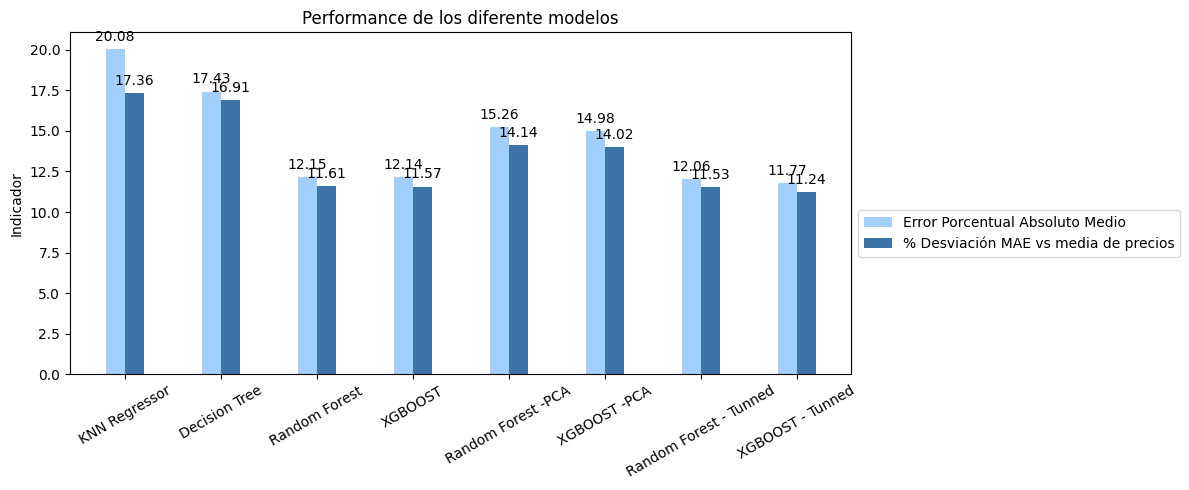

In [ ]:
# Obtener los valores y los nombres de los modelos
modelos = resumen_datos['modelo']
indicadores = ['MAPE','P_error']

# Configuración de barras múltiples
num_barras = len(modelos)
ancho_barras = 0.2
indice = np.arange(num_barras)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12,5))
colores = ['#a2cffe',#'#75bbfd',
           '#3c73a9']
for i, (indicador, color) in enumerate(zip(indicadores, colores)):
    ax.bar(indice + i * ancho_barras, resumen_datos[indicador], ancho_barras, label=indicador,
           color = color)

# Configurar etiquetas y leyendas
ax.set_ylabel('Indicador')
ax.set_title('Performance de los diferente modelos')
ax.set_xticks(indice + ancho_barras * (len(indicadores) - 1) / 2)
ax.set_xticklabels(modelos, rotation=30)
ax.legend(['Error Porcentual Absoluto Medio','% Desviación MAE vs media de precios'],
          loc='best', bbox_to_anchor=(1, 0.5))

# Agregar etiquetas de valores
for i, indicador in enumerate(indicadores):
    for j, valor in enumerate(resumen_datos[indicador]):
        ax.text(j + i * ancho_barras, valor + 0.5, str(round(valor,2)), ha='center')

# Mostrar el gráfico
plt.tight_layout()
# plt.savefig('Figura xx: Performance de los modelos (1) .png', dpi=fig.dpi)
plt.show()

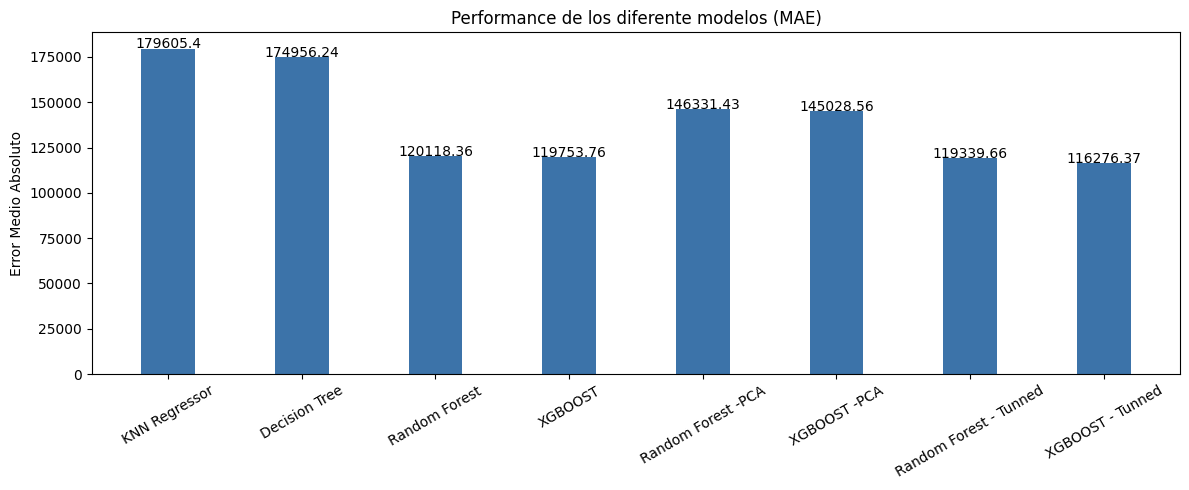

In [ ]:
# Obtener los valores y los nombres de los modelos
modelos = resumen_datos['modelo']
indicadores = ['MAE']

# Configuración de barras múltiples
num_barras = len(modelos)
ancho_barras = 0.4
indice = np.arange(num_barras)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12,5))
colores = [#'#a2cffe',#'#75bbfd',
           '#3c73a9']
for i, (indicador, color) in enumerate(zip(indicadores, colores)):
    ax.bar(indice + i * ancho_barras, resumen_datos[indicador], ancho_barras, label=indicador,
           color = color)

# Configurar etiquetas y leyendas
ax.set_ylabel('Error Medio Absoluto')
ax.set_title('Performance de los diferente modelos (MAE)')
ax.set_xticks(indice + ancho_barras * (len(indicadores) - 1) / 2)
ax.set_xticklabels(modelos, rotation=30)
# ax.legend(['Error Medio absoluto',],
#           loc='best', bbox_to_anchor=(1, 0.5))

# Agregar etiquetas de valores
for i, indicador in enumerate(indicadores):
    for j, valor in enumerate(resumen_datos[indicador]):
        ax.text(j + i * ancho_barras, valor + 100, str(round(valor,2)), ha='center')

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('Figura xx: Performance de los modelos - MAE .png', dpi=fig.dpi)
plt.show()

**RESULTADOS**

1.   El modelo con mejor peformance es XGBOOST, alcanzando -una vez optimizados sus hiperparáemtros y cross validation mediante - un Error Porcentual Absoluto Medio (MAPE) de 11.77, y con una bondad de ajuste (R2) de 0.88. El Error Medio Absoluto  (MAE) es de 116276.37, que en relación a la media de precios del conjunto de testeo representa un error de 11,24%. Es decir, que **las predicciones alcanzadas tienen un error de aproximadamente 11% en el valor de las viviendas.**

2.   En dicho modelo, el precio promedio por barrio del Metro Cuadrado construido es el atributo con mayor peso excplicativo, alcanzando una importancia de 0.23, seguido por la superficie total construida (0.06) y perteneciente a la región de Southern Metropolitan (0.04). El tipo de propiedad (0.03 para "Unit" y 0.02 para "House"), y la antigüedad (0.03) también tienen un rol relevante.

3.   Que la Latitud aparezca entre los atributos con mayor peso y no la longitud nos indica que es más determinante el eje Norte-Sur que el Este-Oeste.

4.   En contra de la hipótesis planteada al principio, la distancia al centro no parece ser por si misma una variable con suficiente peso explicativo. Pareciera estar subsumido su efecto con las dimensiones de superficie y de precio promedio por barrio.


